## Global Power Plant Database

### Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Key attributes of the database

The database includes the following indicators:
- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

#### Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories

**Prediction:**<br>

Make two predictions -
1. Primary Fuel
2. capacity_mw

### Dataset Link

https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


A combination of several numeric and text data are observed.<br>
This project is divided into two tasks:
- Predicting the primary_fuel (classification)
- Predicting the capacity_mw (regression)

### Exploratory Data Analysis

In [3]:
# Getting dimensions of the dataset
df.shape

(907, 27)

There are 907 rows and 27 columns in the dataset.

In [4]:
# Getting the column names
df.columns.to_list()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

*For Classification:*<br>
Independent variables are:<br>
'country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh'<br>
Target variable is:<br>
'primary_fuel',

*For Regression:*<br>
Independent variables are:<br>
'country',
 'country_long',
 'name',
 'gppd_idnr',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh'<br>
Target variable is:<br>
'capacity_mw'

In [5]:
# Checking datatype of each column
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

The datatypes observed in the dataset are object (12), and float64 (15). Some of these maybe missing values and some maybe the same values. We need to check for missing and duplicate values.

In [6]:
# Checking for null values
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There are a lot of missing values in the dataset.
- Variables like other_fuel2, other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh have almost all missing values.
- latitude, longitude, geolocation source, and rest of the columns with less number of missing values may either be imputed or the rows maybe dropped.

All the missing values will be handles in the preprocessing step before building the model.

In [7]:
# Checking for duplicate values
df.duplicated().sum()

0

There are no duplicate rows in the dataset.

In [8]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

From above, we can get an overview of the dataset. As observed before, there are a lot of missing values.
We need to remove all irrelevant columns in the data preprocessing stage.

In [9]:
# Number of unique values for each variable
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Based on the above information, we can see that country, country_long, generation_data_source, and year_of_capacity_data all have single values only. This means that these columns do not vary with either the primary fuel or the capacity, and are irrelevant to our analysis.

#### Data preprocessing

The columns with majority of null values and single unique values need to be removed as they do not add nay value to the analysis. Variables like name, gppd_idnr, owner and url are nominal variables that represent the name, ID, owner's name and website of the power plant. These variables are also irrelevant.

In [10]:
# Removing irrelevant rows
df. drop(columns=['name', 'gppd_idnr', 'country', 'country_long', 'other_fuel2', 'other_fuel3', 'owner',
                  'url', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2019',
                  'generation_data_source', 'estimated_generation_gwh'], inplace=True)

In [11]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [12]:
# Getting dimensions of the dataset
df.shape

(907, 13)

There are 13 columns now in the dataset.

In [13]:
# Getting the column names
df.columns.to_list()

['capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'commissioning_year',
 'source',
 'geolocation_source',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

These columns are relevant to the analysis. But there are some missing values in these too. These need to be handled.

In [14]:
# Checking for null values
df.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

These missing values need to be handled with data imputation or by removing the rows before building the model.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   commissioning_year   527 non-null    float64
 6   source               907 non-null    object 
 7   geolocation_source   888 non-null    object 
 8   generation_gwh_2014  398 non-null    float64
 9   generation_gwh_2015  422 non-null    float64
 10  generation_gwh_2016  434 non-null    float64
 11  generation_gwh_2017  440 non-null    float64
 12  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(4)
memory usage: 92.2+ KB


From above, 

In [16]:
# Number of unique values for each variable
df.nunique()

capacity_mw            361
latitude               836
longitude              827
primary_fuel             8
other_fuel1              3
commissioning_year      73
source                 191
geolocation_source       3
generation_gwh_2014    371
generation_gwh_2015    396
generation_gwh_2016    403
generation_gwh_2017    408
generation_gwh_2018    410
dtype: int64

From above, primary_fuel, other_fuel1 and geolocation_source seem to be categorical. We can observe the frequency of occurrence of each of these classes.

In [17]:
# Frequency of occurence of each value in 'primary_fuel' column
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

Most of the power plants operate on Coal, followed by Hydro. There are only 9 power plants operating on Nuclear as the primary fuel.

In [18]:
# Frequency of occurence of each value in 'other_fuel1' column
df.other_fuel1.value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

Majority of the plants that have a secondary fuel use Oil.<br>
We can also observe that there are a lot of missing values for 'other_fuel1' column, which need to be handled.

In [19]:
# Frequency of occurence of each value in 'geolocation_source' column
df.geolocation_source.value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

The most frequently occurring geolocation source is WRI. There are a few missing values for this column as well, which also need to be handled.

#### Feature engineering

Before proceeding with the dataset description and visualisations, we can perform feature engineering on commissioning year to get the age of the plant The age of the plant would add more value to the analysis, instead of the commissioning year.<br> Since we have information in the dataset till 2019, we can use 2019 as the current year (which means we will get the age of the plant in the year 2019).

In [20]:
df['plant_age'] = df.commissioning_year.apply(lambda x: x if pd.isna(x) else int(2019-x))
df.drop(columns=['commissioning_year'], inplace=True)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,2.5,28.1839,73.2407,Solar,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,8.0
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,4.0


This is the new dataframe. Now we wil proceed with finding the categorical and numerical columns.

In [21]:
cat_cols = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [22]:
num_cols = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_cols.append(i)
print(num_cols)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'plant_age']


#### Dataset description

In [23]:
# Statistical summary of numerical columns
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
count,907.000000,861.000000,861.000000,398.000000,422.000000,434.000000,440.000000,448.000000,527.000000
mean,326.223755,21.197918,77.464907,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.908918
std,590.085456,6.239612,4.939316,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,17.082868
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.725000,16.773900,74.256200,223.557672,176.381063,188.285252,177.874930,193.378250,7.000000
50%,59.200000,21.780000,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,18.000000
75%,385.250000,25.512400,79.440800,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,31.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,92.000000


Observations from the statistical summary:
- capacity_mw has a very high mean compared to its median value. Its is very heavily skerwed to the right.
- latitiude and longitude, have very low left and right skewness respectively.
- generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 have high positive skewness.
- plant_age is skewed to the right as well.

#### Data visualisation

In [24]:
# Setting uniform color palette
sns.set_palette(sns.color_palette("twilight"))

##### Univariate analysis

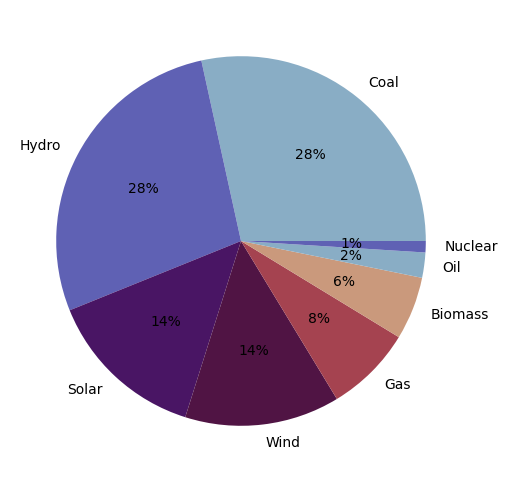

In [25]:
# Visualising the primary_fuel in a pie-chart

plt.figure(figsize=(6, 6))
palette_color = sns.color_palette('twilight')
  
plt.pie(df.primary_fuel.value_counts(), labels=df.primary_fuel.value_counts().index, colors=palette_color, autopct='%.0f%%')
plt.show()

The figure shows that majority of the plants use Coal and Hydro as the primary fuel while very few use Oil or Nuclear as the primary fuel.

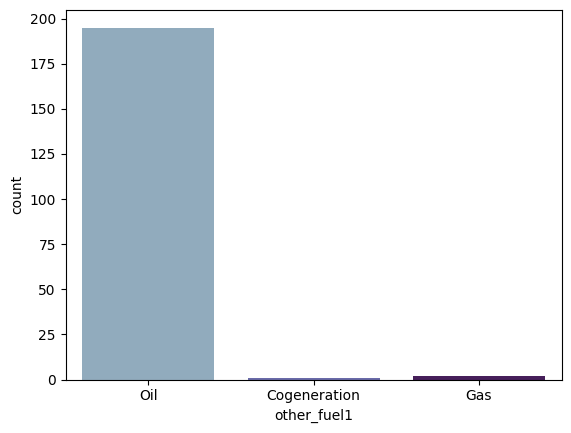

In [26]:
# Visualising the frequency of other_fuel1 in the dataset
sns.countplot(x=df.other_fuel1)
plt.show()

Oil is the most frequently used secondary fuel (other_fuel1).

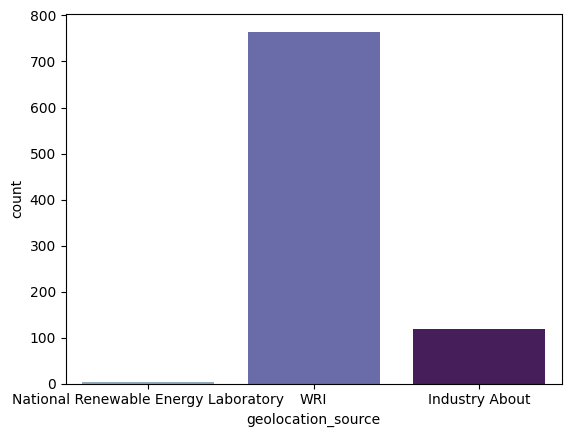

In [27]:
# Visualising the frequency of geolocation_source in the dataset
sns.countplot(x=df.geolocation_source)
plt.show()

The most frequently occuring geolocation source is WRI.

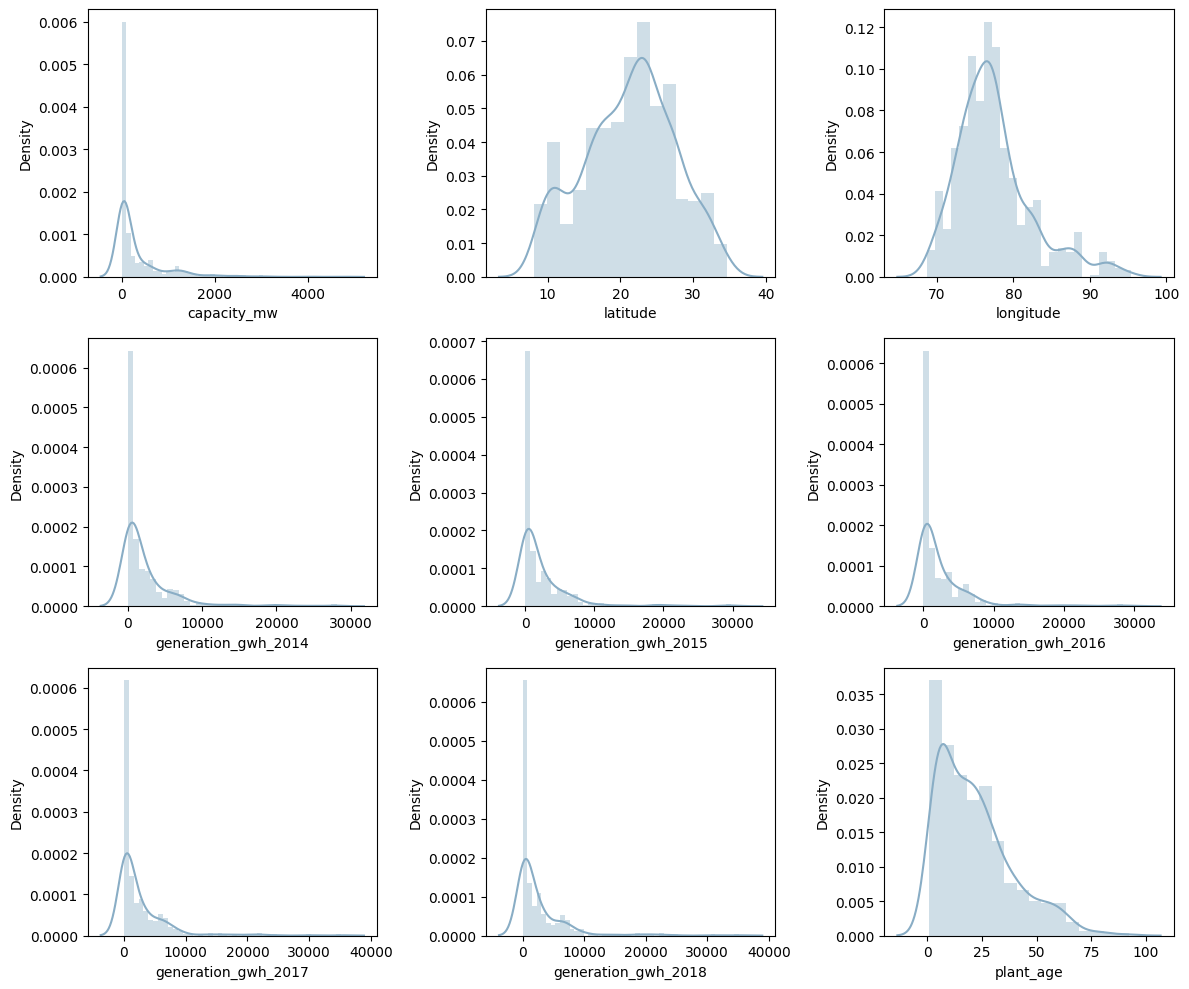

In [28]:
# Data distribution for numerical columns
plt.figure(figsize=(12, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 9:
        ax = plt.subplot(3, 3, plot_num)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

From above we can observe that:
- latitude and longitude are almost normally distributed, with latitude having slight left skewness and longitde having slight right skewness.
- Rest of the variables are all highly skewed to the right.

##### Bivariate analysis

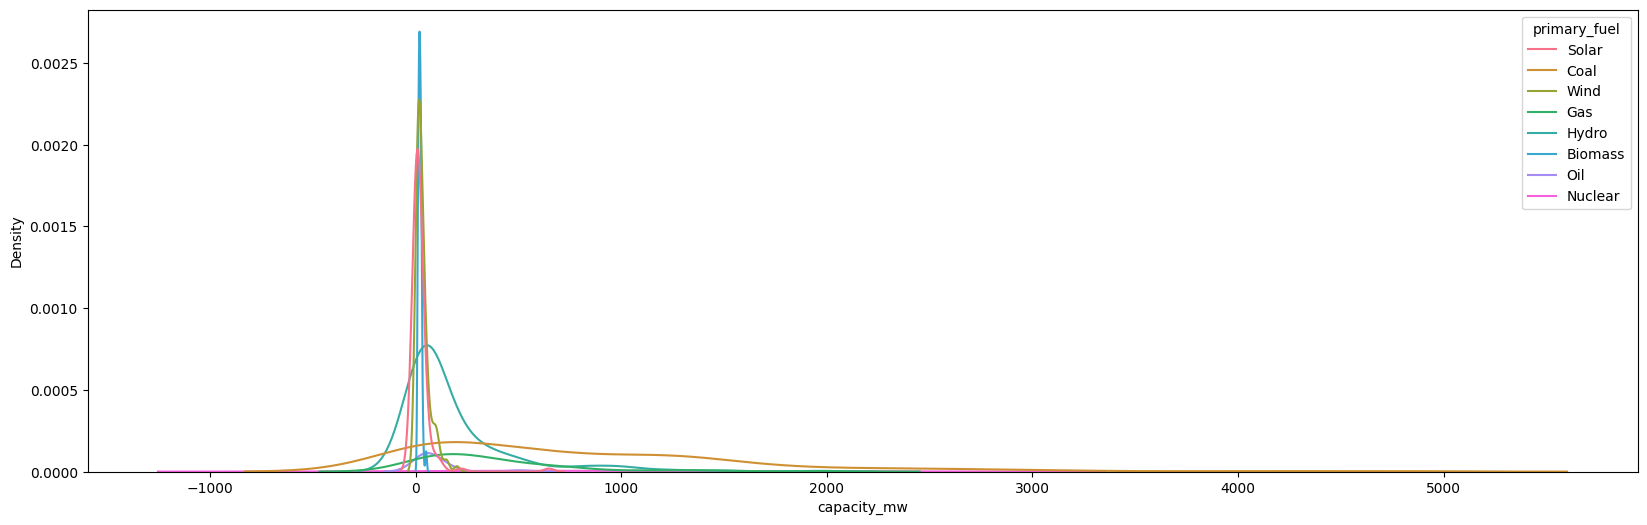

In [29]:
# capacity_mw vs primary_fuel
plt.figure(figsize=(20, 6))
sns.kdeplot(x="capacity_mw", data=df, hue="primary_fuel")
plt.show()

From the graph above we can observe that:
- The capacity for plants with Coal as the primary fuel has a very broad range, which means Coal powered plants can range from small to large sizes.
- The capacity_mw for Gas powered plants is also observed to have a broad range (less than coal). So, Gas powered plants tend to range form small to medium sizes.
- For plants operating on Hydro as the primary fuel, the capacity tends to be within 500 MW and peaks closer to 0, which means that there are more plants with smaller size observed.
- For plants operating on Biomass, Wind, and Solar as primary fuel, the capacity_mw range is very less, and closer to 0. This means that all these fuels are used for small-sized plants.
- There are very few plants operating on Oil and Nuclear. The capacity_mw for Oil plants is observed to be within a small range indicating that the size of these plants are very small, while the capacity for Nuclear plants shows a very small range closer to 1000.

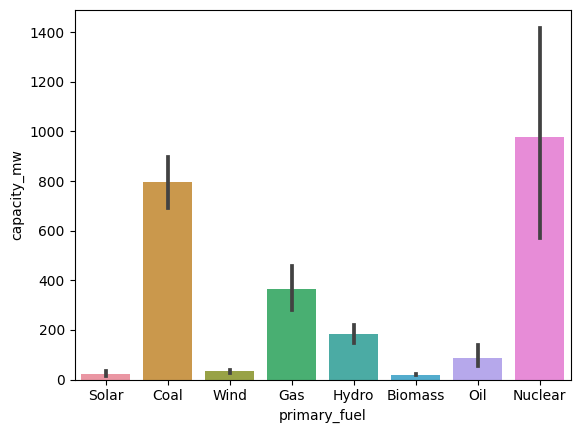

In [30]:
# capacity_mw vs primary_fuel
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

The figure above shows the average sizes of the power plants based on the primary fuel.
- Nuclear power plants seem to have the maximum average size (close to 1000 MW), followed by Coal power plants (around 800 MW).
- Gas power plants have an average size close to 400 MW, Hydro plants have an average size around 200 MW and Oil power plants have an average size of around 100 MW.
- Solar, Wind and Biomass power plants all have very small sizes.

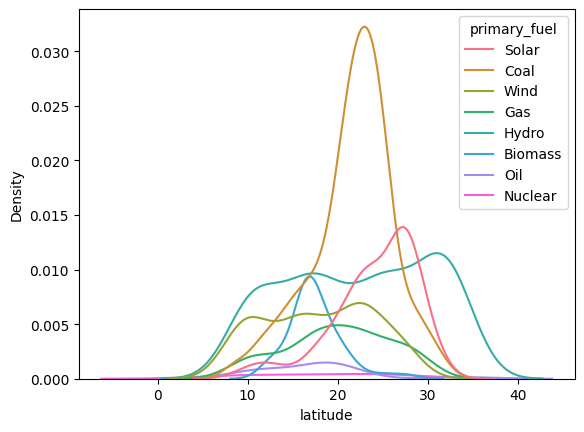

In [31]:
# latitude vs primary_fuel
sns.kdeplot(x="latitude", data=df, hue="primary_fuel")
plt.show()

This latitude distribution plot shows the following:
- Most Coal powered plants lie around the 20 - 30 degree latitude, and Biomass power plants lie around 15-20 degree latitude.
- Most Hydro power plants vary in latitude from 10 to 35 degrees, while Wind power plants vary from 10 to 30 degrees latitude.
- Solar and Gas power plants start from 10 degree to 30 degree. Solar peaks around 30 degree latitude, while Gas peaks around 20 degree.
- Oil and Nuclear also range from 10 to 30 degrees, and tend to peak around 20 degrees.

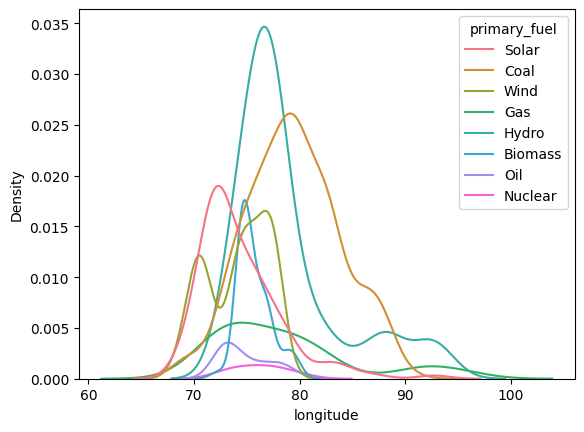

In [32]:
# longitude vs primary_fuel
sns.kdeplot(x="longitude", data=df, hue="primary_fuel")
plt.show()

The longitude distribution shows the following:
- Hydro power plants have a longitudinal range from after 70 to a little over 90 degrees, peaking at around 75 degree.
- Coal power plants range from 70 to 90 degrees and peak at around 80 degrees.
- Solar power plants peak at a little over 70 degrees and range from around 70 to 80 degrees.
- Wind power plants peak at around 70 degrees and then a little below 80 degrees.
- Biomass power plants range from 70 to 80 degrees longitude, peaking at about 75 degrees.
- Gas power plants seem to be sprad over a wide longitudinal range, with maximum plants occuring between 75 to 80 degrees.
- Oil plants range from 70 to 80 degrees and peak closer to 70 degree.
- Nuclear plants also range from 70 to 80, being almost equally spread with peak closer to 80 degree.

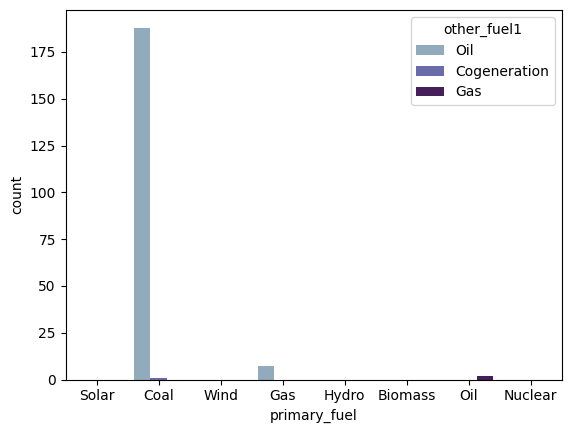

In [33]:
# other_fuel1 vs primary_fuel
sns.countplot(x="primary_fuel", data=df, hue="other_fuel1")
plt.xticks(rotation=0)
plt.show()

From above we can see that only Coal, Gas and Oil power plants have a value for other_fuel1.<br>
For most Coal plants the secondary fuel is Oil. For some of them, the other_fuel1 is Cogeneration.<br>
For Gas power plants, the ones that use other fuels, only use Oil.<br>
For Oil power plants, the other fuel used is Gas.

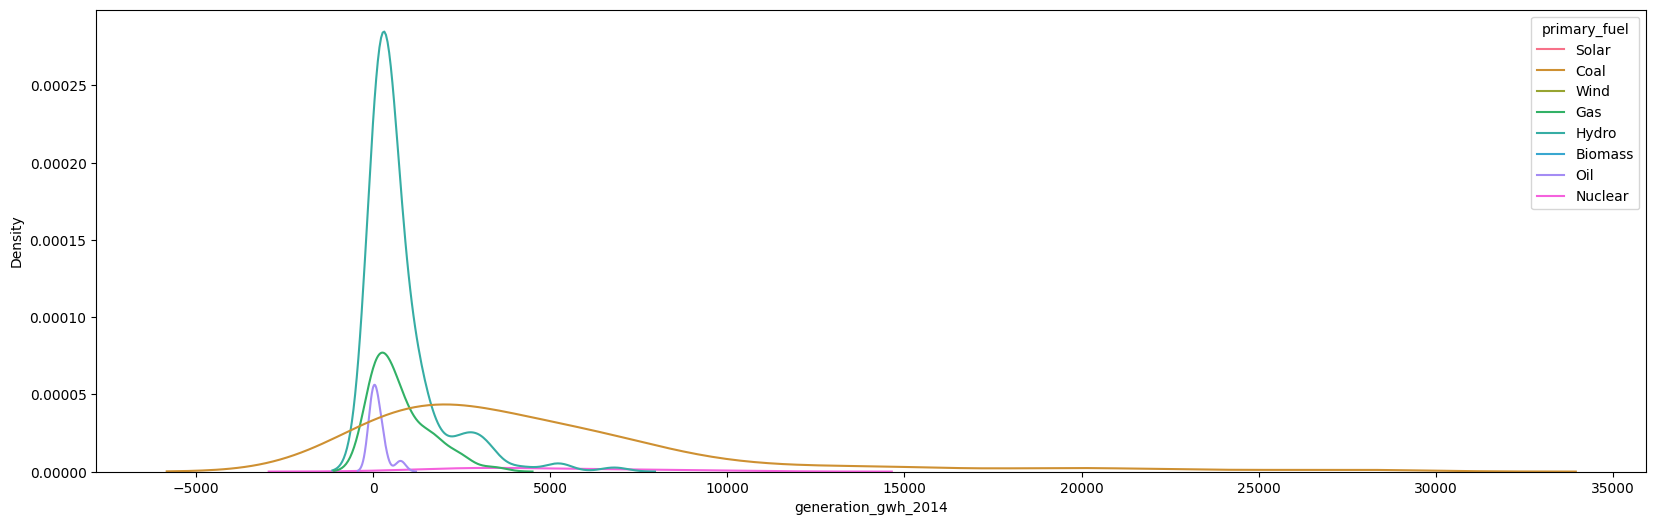

In [34]:
# generation_gwh_2014 vs primary_fuel
plt.figure(figsize=(20, 6))
sns.kdeplot(x="generation_gwh_2014", data=df, hue="primary_fuel")
plt.show()

The electricity generation in 2014 from Hydro and Gas power plants peaked at around 1000 GWh.<br>
The electricity generation from Oil power plants seemed to be very low.<br>
Coal and Nuclear power plants generated high amount energy, peaking at a little below 5000 GWh.<br>
There was no energy generation observed for Solar, Wind and Biomass power plants in 2014.

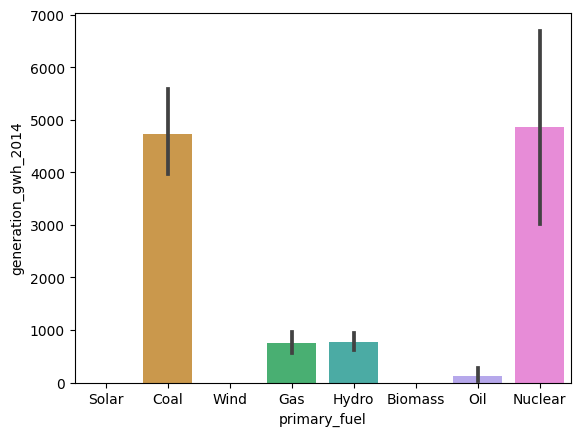

In [35]:
# generation_gwh_2014 vs primary_fuel
sns.barplot(x = "primary_fuel", y = "generation_gwh_2014", data = df)
plt.show()

From the above plot we can get the average electricity generation in 2014 for plants with each different primary fuel.
- Coal and Nuclear power plants have the highest average electricity generation in 2014.
- Gas and Hydro power plants had an average electricity generation capacity of less than 1000 GWh in 2014.
- Oil power plants seem to have generated very low electricity in 2014.
- No electricity was generated from Solar, Wind or Biomass power plants.

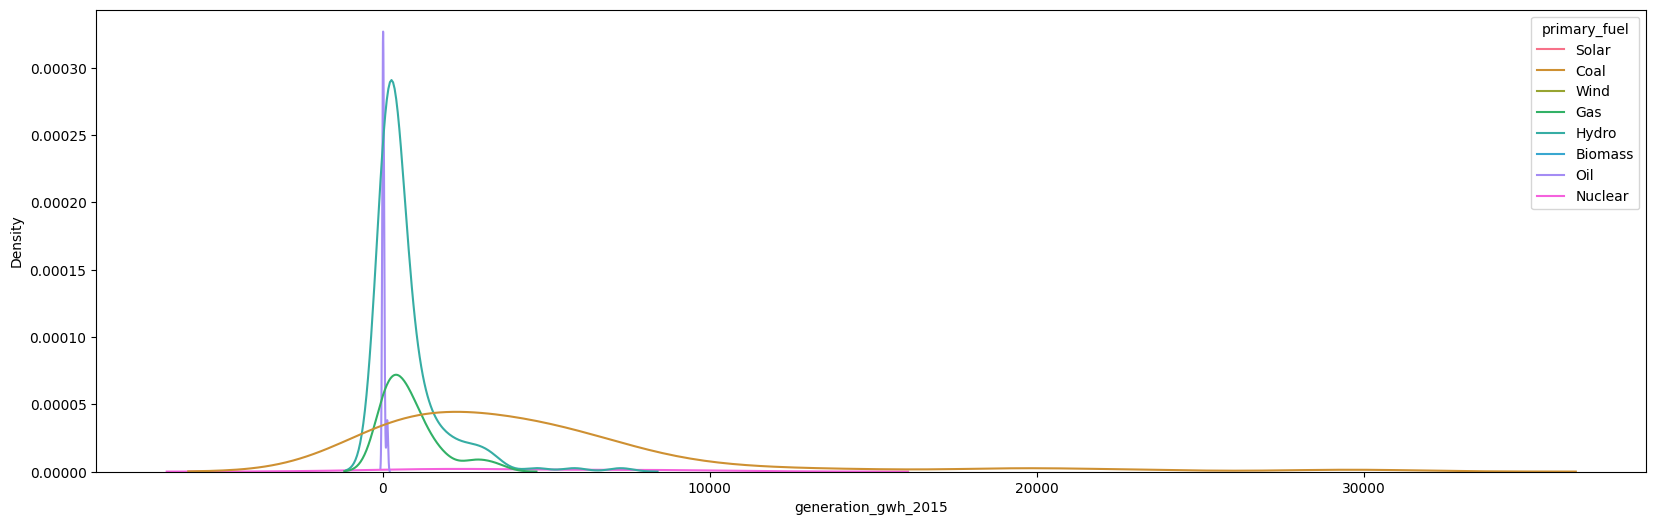

In [36]:
# generation_gwh_2015 vs primary_fuel
plt.figure(figsize=(20, 6))
sns.kdeplot(x="generation_gwh_2015", data=df, hue="primary_fuel")
plt.show()

The electricity generation in 2015 from Hydro and Gas power plants peaked at value lower than 1000 GWh.<br>
The electricity generation from Oil power plants seemed to be very low, but the number of plants generating electricity seem to have increased.<br>
Coal and Nuclear power plants generated high amount energy, peaking at a little below 5000 GWh.<br>
There was no energy generation observed for Solar, Wind and Biomass power plants in 2015.

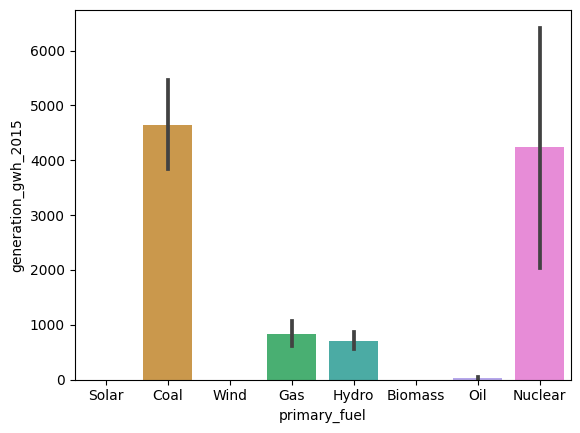

In [37]:
# generation_gwh_2015 vs primary_fuel
sns.barplot(x = "primary_fuel", y = "generation_gwh_2015", data = df)
plt.show()

From the above plot we can get the average electricity generation in 2015 for plants operating on the different primary fuels.
- Coal and Nuclear power plants have the highest average electricity generation in 2015, with Coal generating higher amount of electricity compared to Nuclear.
- Gas and Hydro power plants had an average electricity generation capacity of less than 1000 GWh in 2015, with Gas power plants generating slightly higher amount of electricity.
- Oil power plants seem to have generated very low electricity in 2015 as well.
- No electricity was generated from Solar, Wind or Biomass power plants in 2015.

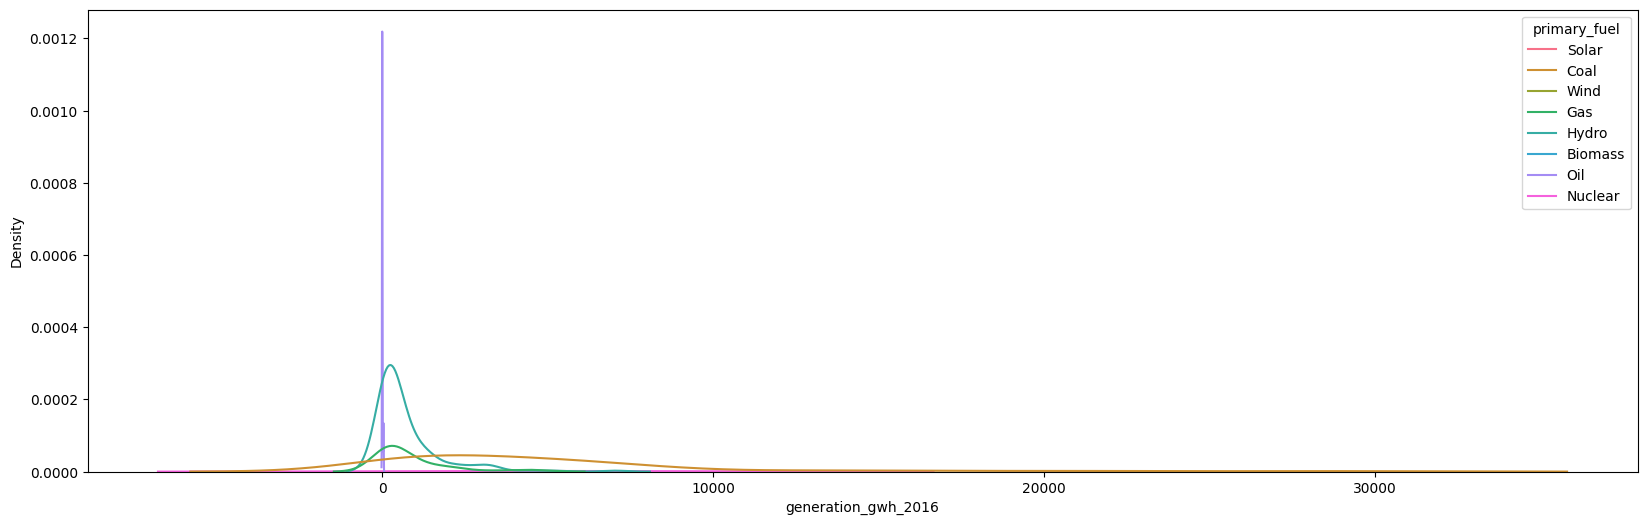

In [38]:
# generation_gwh_2016 vs primary_fuel
plt.figure(figsize=(20, 6))
sns.kdeplot(x="generation_gwh_2016", data=df, hue="primary_fuel")
plt.show()

The electricity generation in 2016 from Hydro and Gas power plants peaked at around 1000 GWh, similar to 2015.<br>
The average electricity generation from Oil power plants seemed to be lower than 2015 and 2014.<br>
Coal and Nuclear power plants generated high amount energy, peaking at a little below 5000 GWh. Number of Coal power plants generating high electricity seem to have reduced from 2015.<br>
There was no energy generation observed for Solar, Wind and Biomass power plants in 2016.

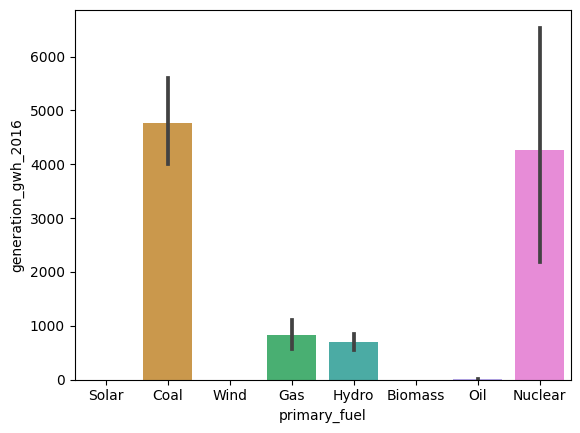

In [39]:
# generation_gwh_2016 vs primary_fuel
sns.barplot(x = "primary_fuel", y = "generation_gwh_2016", data = df)
plt.show()

From the above plot we can get the average electricity generation in 2016 for plants with each different primary fuel.
- Coal and Nuclear power plants have the highest average electricity generation in 2016. The average electricity generation for Coal Power plants is 
- Gas and Hydro power plants had an average electricity generation capacity of less than 1000 GWh in 2014.
- Oil power plants seem to have generated very low electricity in 2016.
- No electricity was generated from Solar, Wind or Biomass power plants.

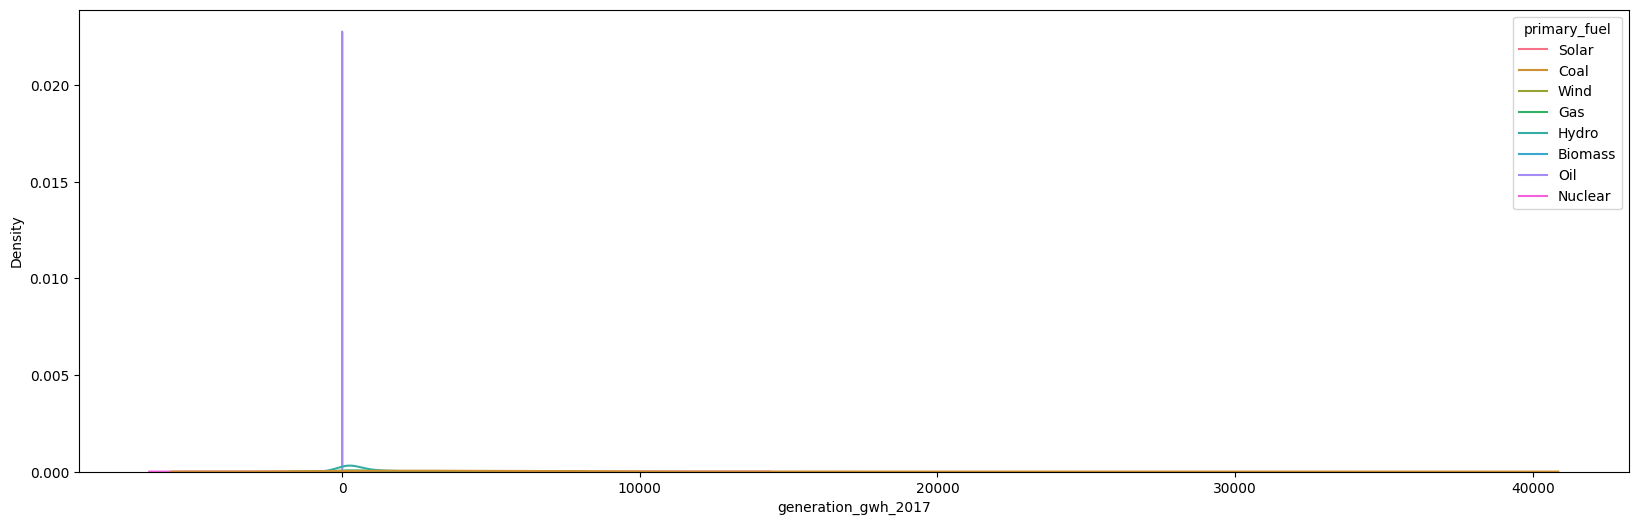

In [40]:
# generation_gwh_2017 vs primary_fuel
plt.figure(figsize=(20, 6))
sns.kdeplot(x="generation_gwh_2017", data=df, hue="primary_fuel")
plt.show()

The electricity generation in 2017 from Hydro and Gas power plants peaked at values lower than 1000 GWh.<br>
The electricity generation from Oil power plants on an average seemed to be very very low (close to 0).<br>
Coal and Nuclear power plants seemed to generate high amount electricity, but the peak is not clearly visible here.<br>
There was no energy generation observed for Solar, Wind and Biomass power plants in 2017.

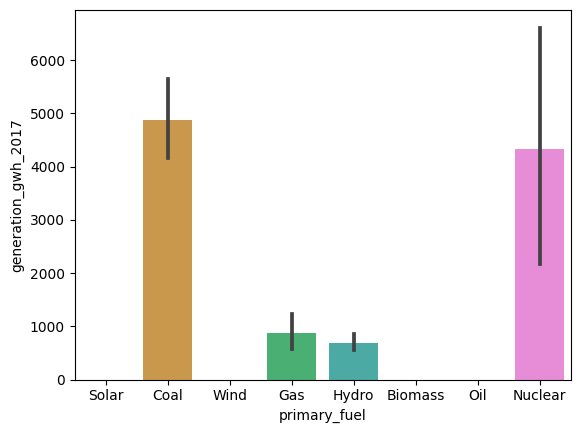

In [41]:
# generation_gwh_2017 vs primary_fuel
sns.barplot(x = "primary_fuel", y = "generation_gwh_2017", data = df)
plt.show()

From the above plot we can get the average electricity generation in 2014 for plants with each different primary fuel.
- Coal and Nuclear power plants have the highest average electricity generation in 2017, with Coal almost generating 5000 GWh of electricity.
- Gas and Hydro power plants had an average electricity generation capacity of less than 1000 GWh.
- Oil power plants seem to not have generated much electricity on an average.
- No electricity was generated from Solar, Wind or Biomass power plants in 2017.

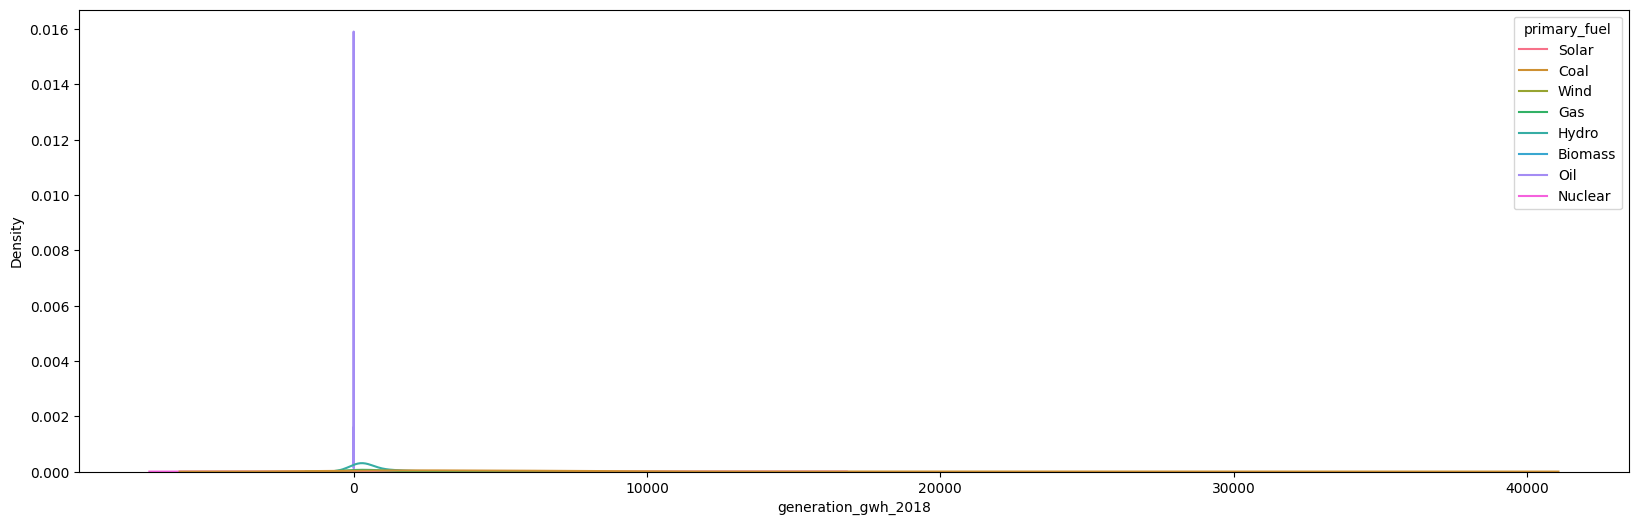

In [42]:
# generation_gwh_2018 vs primary_fuel
plt.figure(figsize=(20, 6))
sns.kdeplot(x="generation_gwh_2018", data=df, hue="primary_fuel")
plt.show()

The electricity generation in 2018 from Hydro and Gas power plants peaked at values closer to 0, similar to 2017<br>
The electricity generation from Oil power plants seemed to be very low just like in 2017.<br>
Coal and Nuclear power plants generated high amount of electricity, but as in 2017, the peak is not clear.<br>
There was no energy generation observed for Solar, Wind and Biomass power plants in 2018.

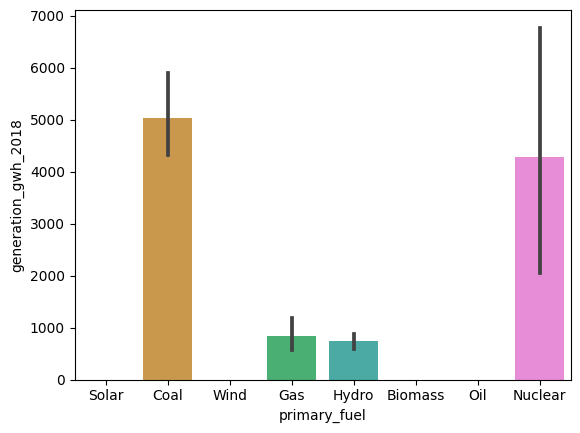

In [43]:
# generation_gwh_2018 vs primary_fuel
sns.barplot(x = "primary_fuel", y = "generation_gwh_2018", data = df)
plt.show()

From the above plot we can get the average electricity generation in 2018 for plants with each different primary fuel.
- Coal and Nuclear power plants have the highest average electricity generation in 2018, with Coal generating almost 5000 GWh of energy on average.
- Gas and Hydro power plants had an average electricity generation capacity of less than 1000 GWh in 2018.
- Oil power plants seem to have generated almost no electricity on average in 2018.
- No electricity was generated from Solar, Wind or Biomass power plants.

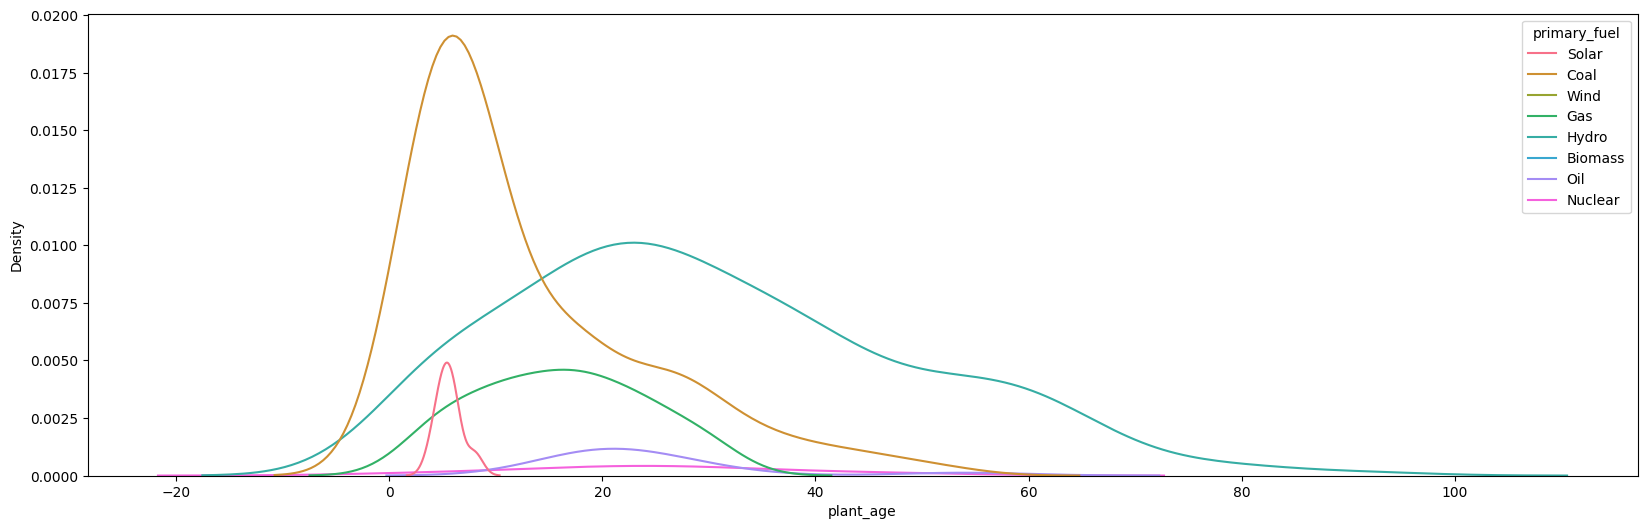

In [44]:
# plant_age vs primary_fuel
plt.figure(figsize=(20, 6))
sns.kdeplot(x="plant_age", data=df, hue="primary_fuel")
plt.show()

- There seems to be a high number of Coal and Hydro plants. On average Coal plants seem have lower age than Hydro plants. We can observe from the plot that the age of Coal plants go upto around 50 while that of Hydro plants go beyond that upto around 75.
- Oil and Nuclear power plants seem to be quite older as well with an average age between 20 and 25.
- There are a fair number of Gas power plants observed with an average age between 15 and 20.
- There are a few Solar power plants, which seem to be relatively newer with an average age close to 5.
- The age of Wind and Biomass powerplants seem to be unavailable.

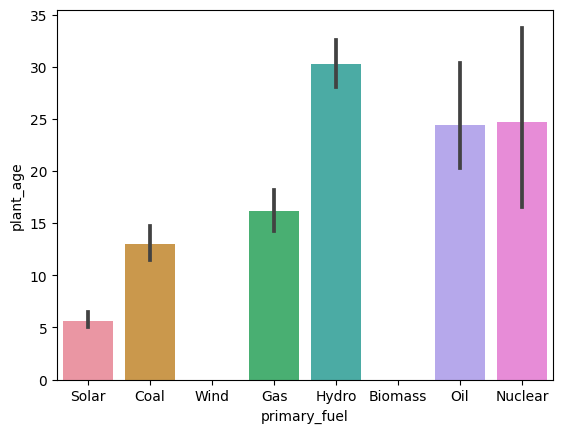

In [45]:
# plant_age vs primary_fuel
sns.barplot(x = "primary_fuel", y = "plant_age", data = df)
plt.show()

- Hydro power plants seem to have the maximum average age (over 30), which means most of the Hydro power plants are older.
- Oil and Nuclear power plants have an average age of around 25.
- Gas power plants had an average age of around 16 or 17.
- Coal power plants seem to have an average age less than 15, which means there are many newer Coal power plants compared to older ones.
- Solar power plants seem to have an average age close to 5, which shows that they are relatively newer.
- No age valur are available for Wind and Biomass power plants.

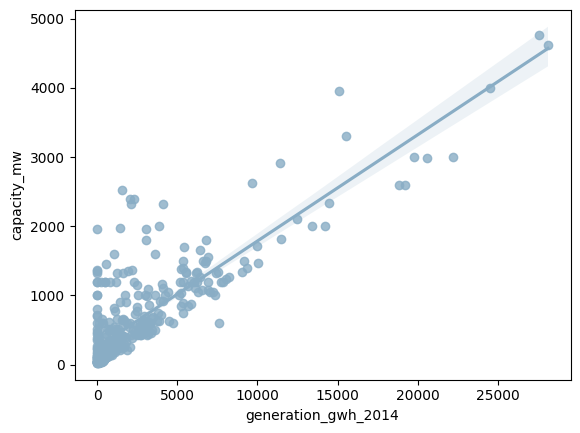

In [46]:
# generation_gwh_2014 vs capacity_mw
sns.regplot(x="generation_gwh_2014", y="capacity_mw", data=df)
plt.show()

There seems to be a positive correlation between generation_gwh_2014 and capacity_mw.

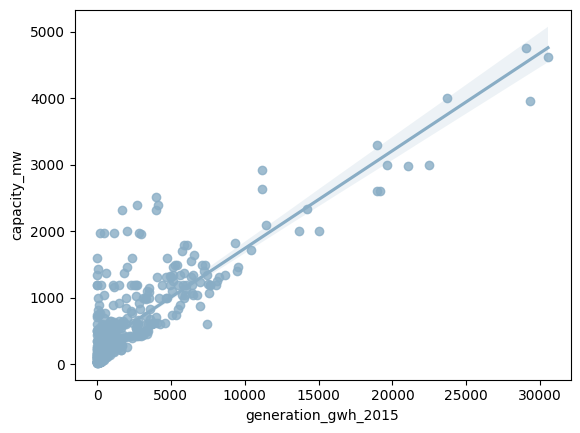

In [47]:
# generation_gwh_2015 vs capacity_mw
sns.regplot(x="generation_gwh_2015", y="capacity_mw", data=df)
plt.show()

Again, there seems to be a positive correlation between generation_gwh_2015 and capacity_mw.

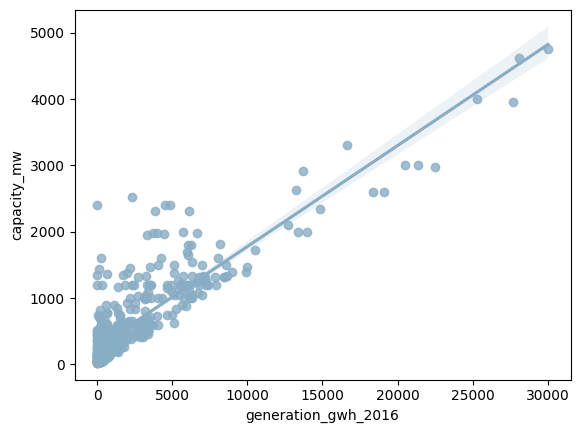

In [48]:
# generation_gwh_2016 vs capacity_mw
sns.regplot(x="generation_gwh_2016", y="capacity_mw", data=df)
plt.show()

There is also a positive correlation between generation_gwh_2016 and capacity_mw.

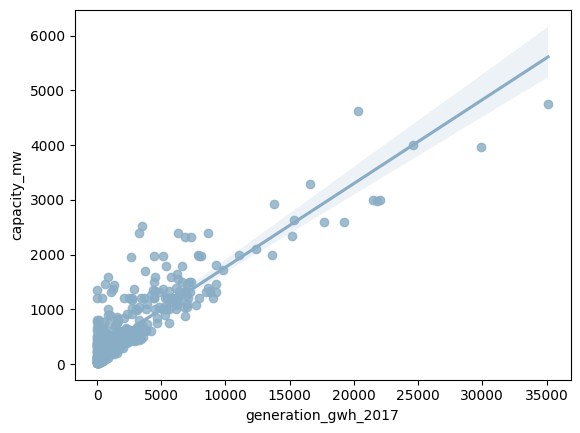

In [49]:
# generation_gwh_2017 vs capacity_mw
sns.regplot(x="generation_gwh_2017", y="capacity_mw", data=df)
plt.show()

There seems to be a positive correlation between generation_gwh_2017 and capacity_mw.

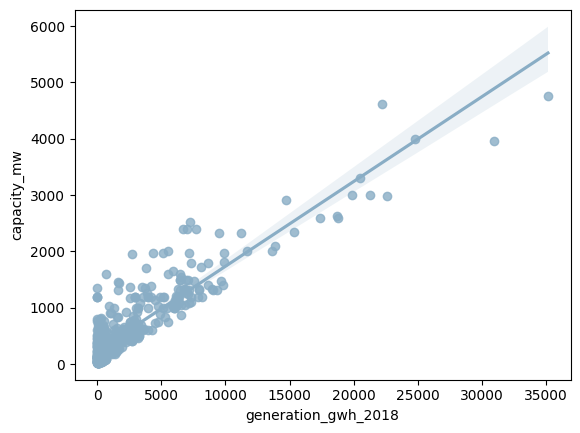

In [50]:
# generation_gwh_2018 vs capacity_mw
sns.regplot(x="generation_gwh_2018", y="capacity_mw", data=df)
plt.show()

Again, there seems to be a positive correlation between generation_gwh_2018 and capacity_mw.

It can be observed that the electricity generation increases with increase in capacity of the power plant.

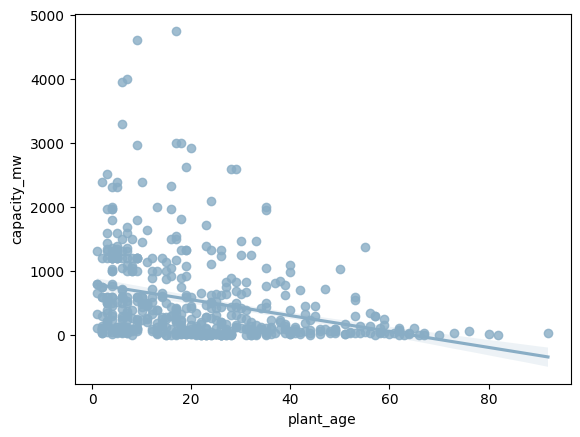

In [51]:
# plant_age vs capacity_mw
sns.regplot(x="plant_age", y="capacity_mw", data=df)
plt.show()

We can observe a negative relationship between plant_age and capacity_mw, which means that newer plants have higher capacity than older plants.

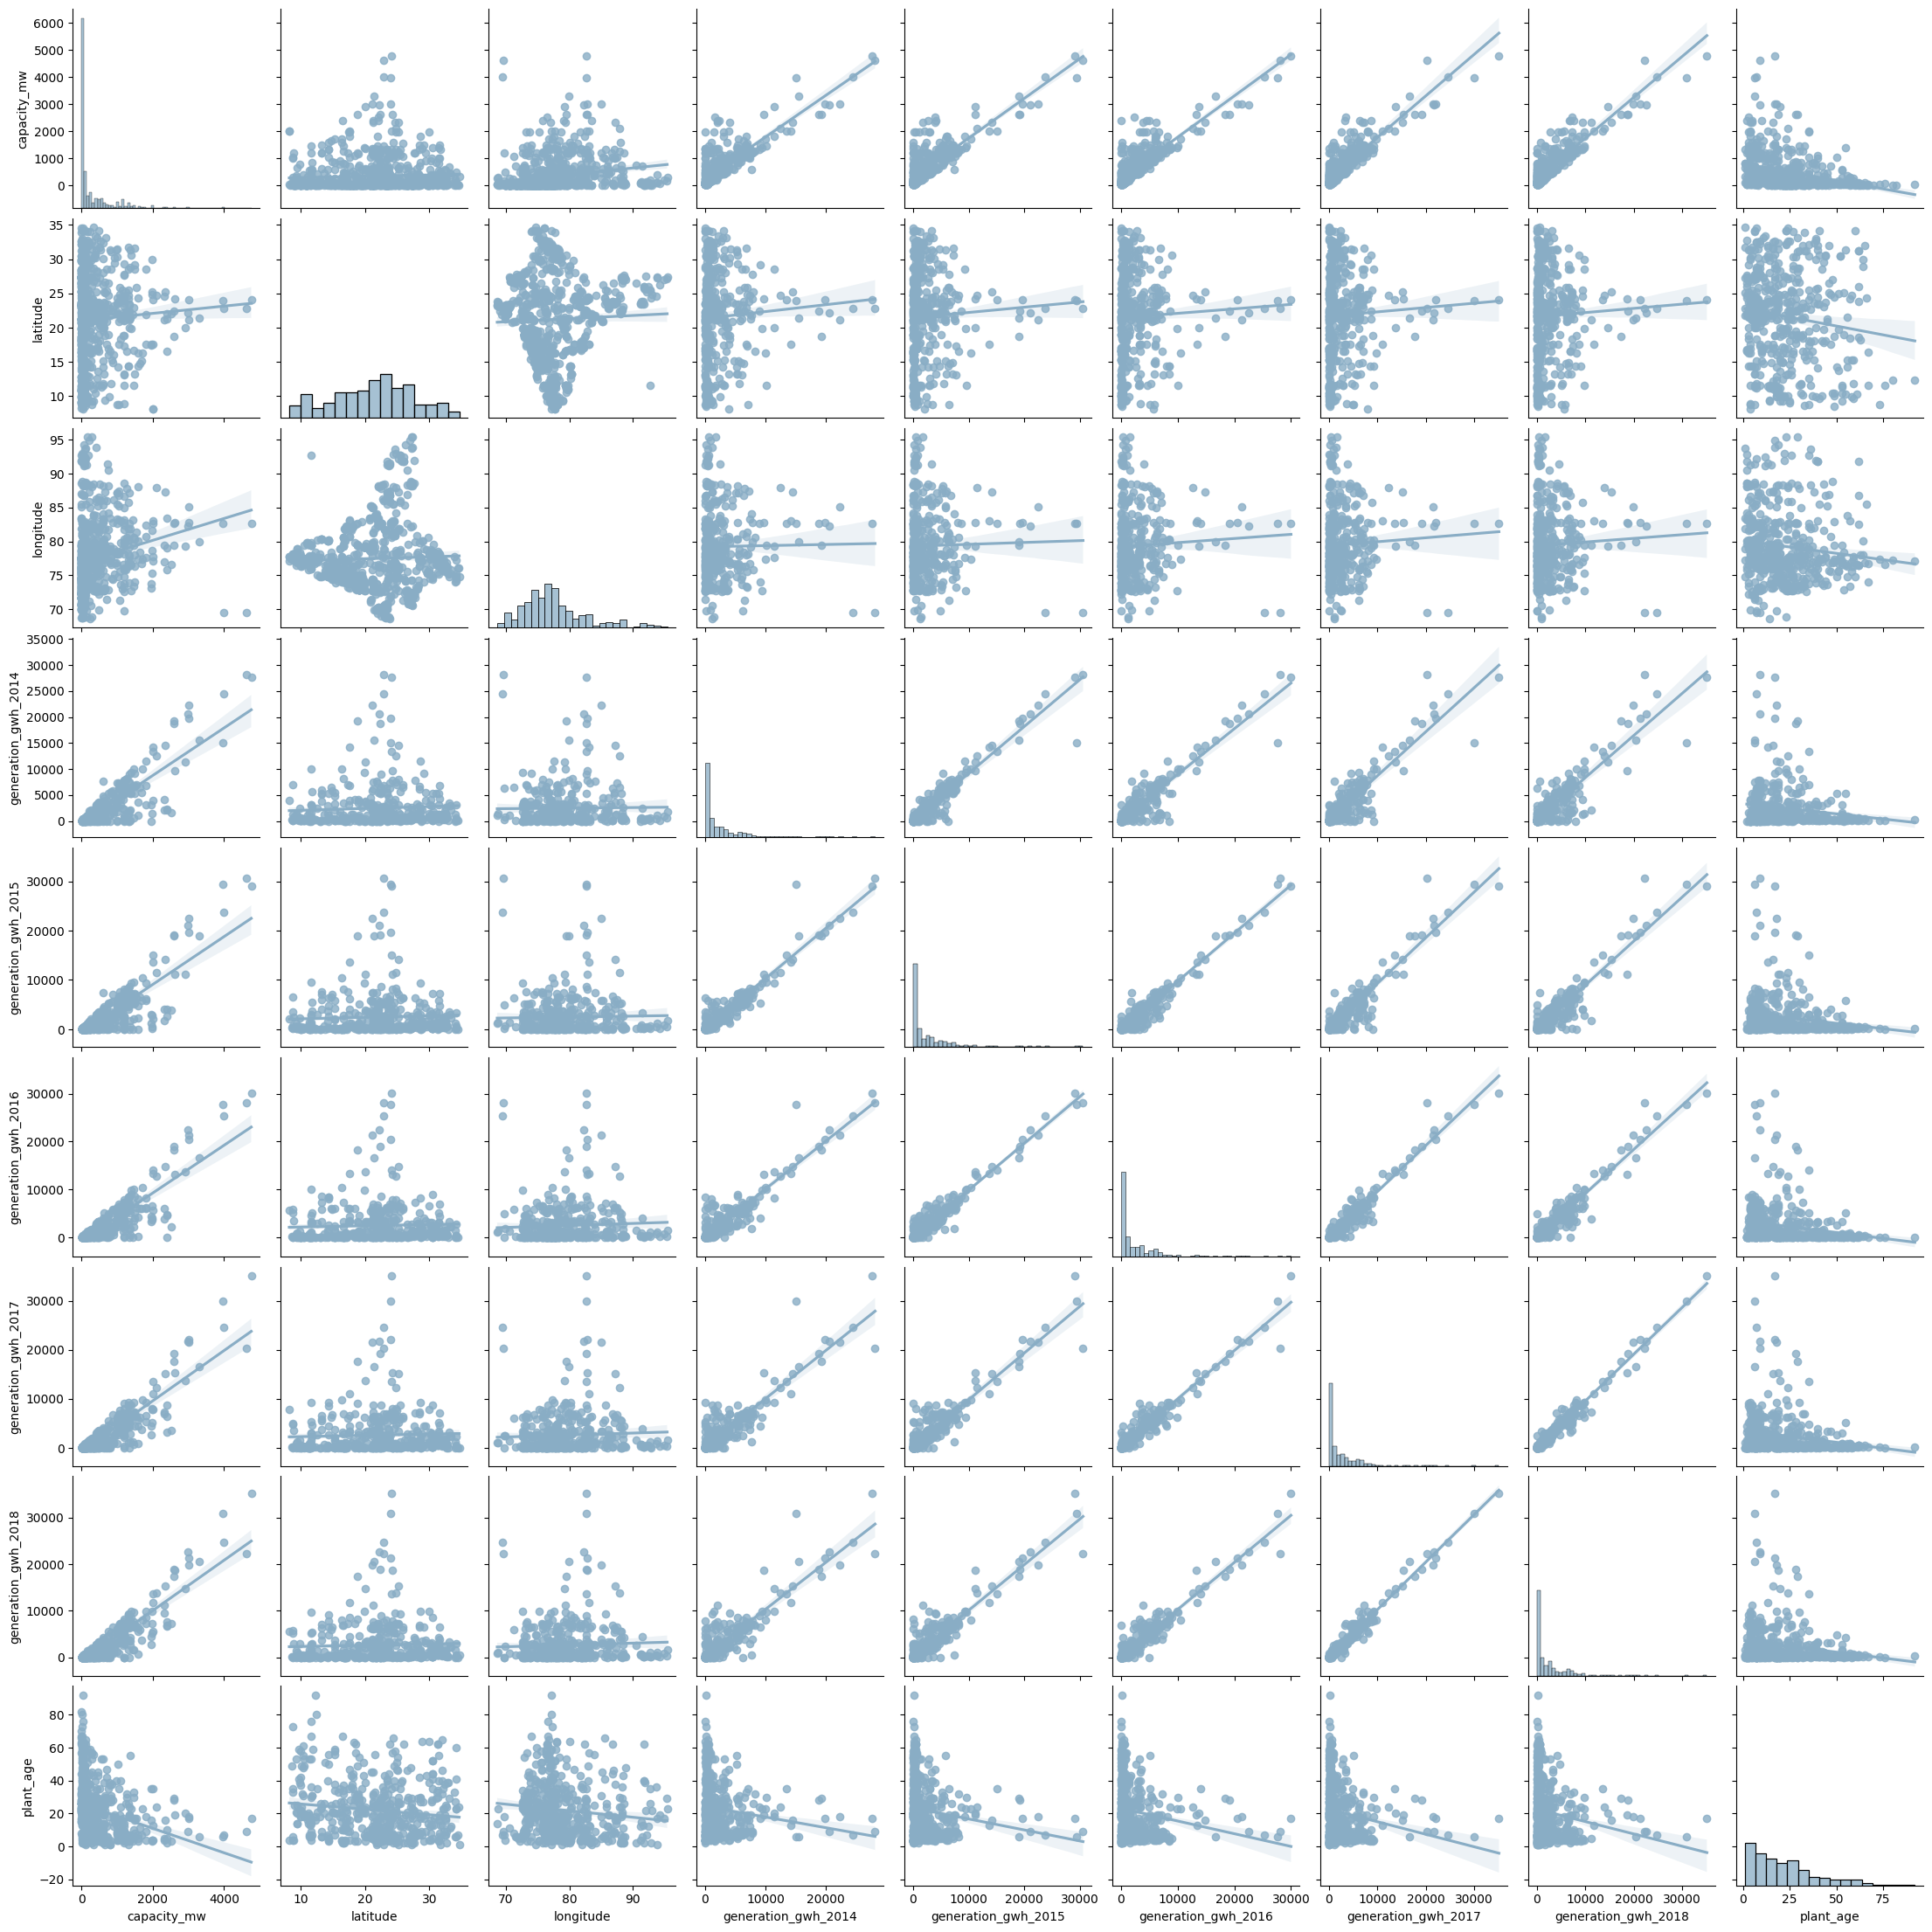

In [52]:
sns.pairplot(df, kind='reg')
plt.show()

- The electricity generation for every year is positively correlated with each other as well as with the capacity of the plant.
- The electricity generation and capacity of the plant has a negative relationship with the age of the plant, meaning newer plants have higher capacity and higher electricity generation.
- All variables have a weak relationship with the latitude and longitude. Based on the latitude and longitude values, we can observe that the power plants are spread all accross the country, as the latitude and longitude plot seems to be in the shape of India.

### Data Imputation

Before proceeding to check for outliers and skewness, the missing data need to be filled.

In [53]:
df.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
plant_age              380
dtype: int64

The columns that require imputation are latitude, longitude, other_fuel1, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, and plant_age.

In [54]:
# The latitude and longitude have very less skewness as seen from the distribution
df["latitude"] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())

# The other numerical columns have high skewness, so they need to be imputed with the median
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())
df['plant_age'] = df['plant_age'].fillna(df['plant_age'].median())

# For categorical columns we need to impute using the mode value
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

In [55]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


Now the missing values have been handled by data imputation.

In [56]:
df.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
plant_age              0
dtype: int64

There are no more missing values.

### Checking for outliers

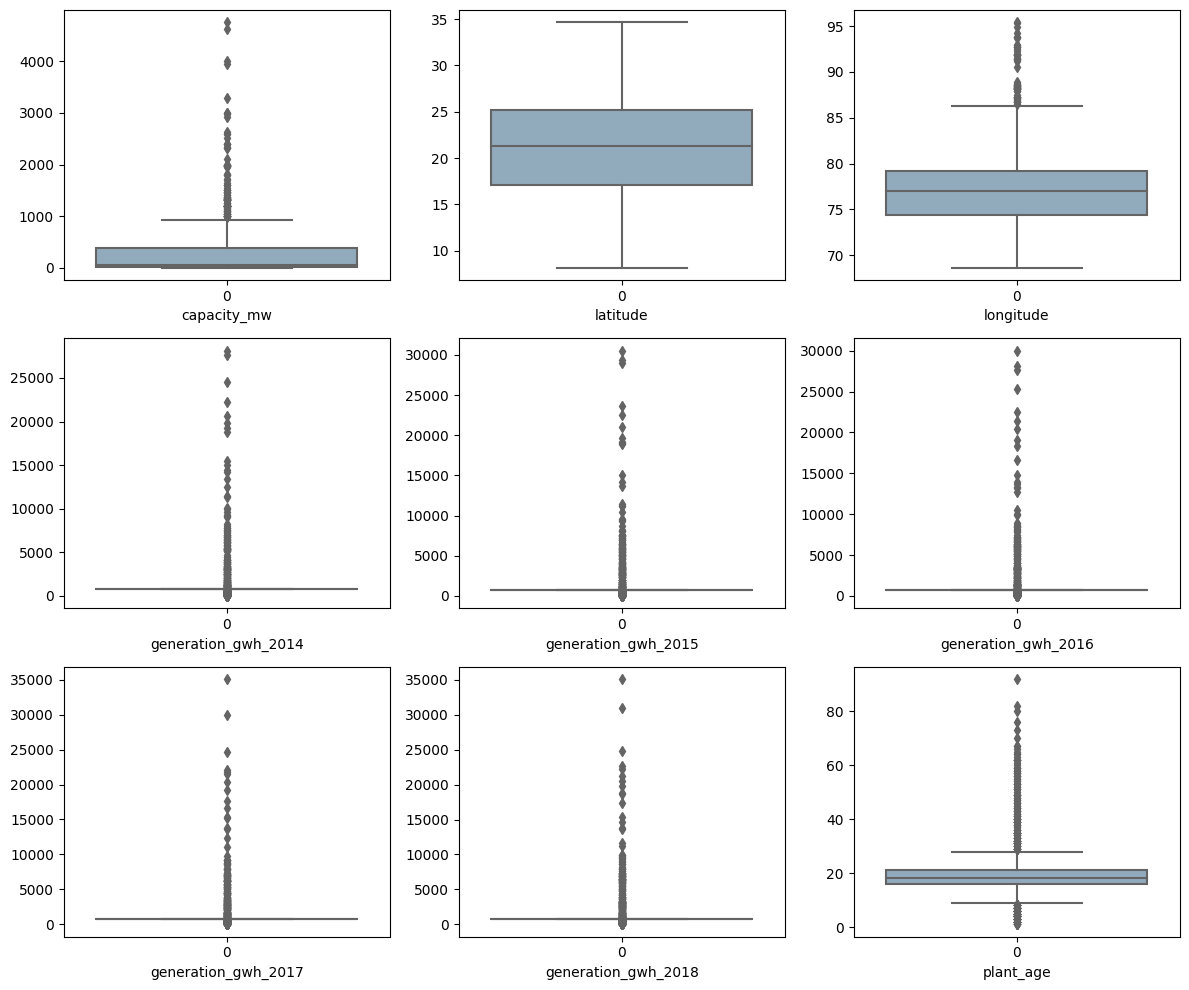

In [57]:
# Checking for outliers using boxplot
plt.figure(figsize=(12, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 9:
        ax = plt.subplot(3, 3, plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

Except for latitude, all columns seem to have outliers. These need to be removed before proceeding.

#### Z-score method

In [58]:
from scipy.stats import zscore

In [59]:
out_features = df[['capacity_mw', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'plant_age']]
z = np.abs(zscore(out_features))
z

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,0.548908,0.878280,0.257022,0.267783,0.275737,0.275565,0.288394,0.933076
1,0.386977,0.593788,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
2,0.486679,1.682394,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
3,0.324240,2.889052,0.322873,0.223348,0.226194,0.326203,0.327990,0.400812
4,2.498942,1.027976,0.545554,1.476964,1.557432,1.224379,1.772608,1.237227
...,...,...,...,...,...,...,...,...
902,2.159821,0.022477,0.257022,0.505833,0.443415,0.259992,0.308963,1.313265
903,0.548060,0.145644,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
904,0.509909,0.391673,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
905,0.417498,0.772866,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699


In [60]:
# Removing data where z-score is above 3 (threshold value) for normal distribution
df_z = df[(z<3).all(axis=1)]
df_z.shape

(846, 13)

In [61]:
# Data loss percentage
old = df.shape[0]
new_z = df_z.shape[0]

(old - new_z)/old * 100

6.725468577728775

Data loss percentage is around 6.72% for Z-score method.

#### IQR method

In [62]:
q1 = out_features.quantile(0.25)
q3 = out_features.quantile(0.75)

iqr = q3 - q1

df_q = df[~((df < (q1 - 1.5*iqr))| (df > (q3 + 1.5*iqr))).any(axis=1)]

df_q.shape

(419, 13)

In [63]:
# Data loss percentage
old = df.shape[0]
new_q = df_q.shape[0]

(old - new_q)/old * 100

53.8037486218302

Data loss percentage is around 53.8%, which is very very high. Normally, we consider data loss of less than 10% only.<br>

So, we will use the z-score method to remove outliers.

In [64]:
df = df_z

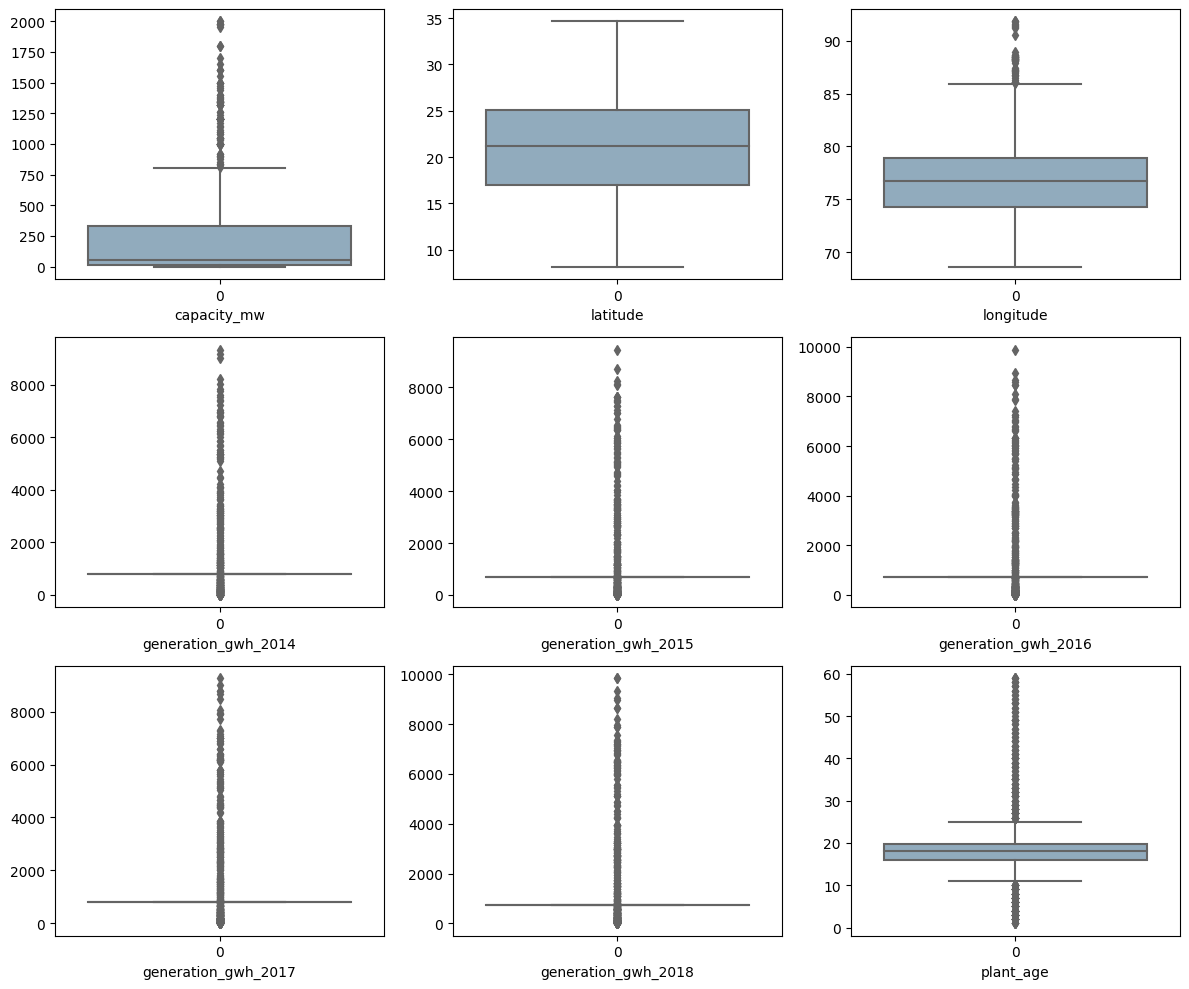

In [65]:
# Checking for outliers again using boxplot
plt.figure(figsize=(12, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 9:
        ax = plt.subplot(3, 3, plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

There are fewer outliers in the dataset now. We should check and remove skewness.

### Checking for skewness

In [66]:
df.skew()

capacity_mw            1.992633
latitude              -0.118531
longitude              0.921631
generation_gwh_2014    2.961146
generation_gwh_2015    2.760332
generation_gwh_2016    2.699308
generation_gwh_2017    2.598081
generation_gwh_2018    2.663498
plant_age              1.288240
dtype: float64

The acceptable skewness range is between -0.5 to 0.5 (for extremely normal distributions)<br>
This means that all columns except latitude have high skewness that needs to be removed.

In [67]:
#Importing extra libraries to remove skewness
from scipy import stats
from scipy import special

In [68]:
# Removing skewness
columns = ['capacity_mw', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'plant_age']

skew_transform = {}

for col in columns:
    transformed_log = np.log(df[col])                        # Log Transformation
    transformed_boxcox = special.boxcox1p(df[col], 0.15)     # Box-Cox Transformation with lambda=0.15
    transformed_inverse = 1 / df[col]                        # Inverse Transformation
    transformed_yeojohnson, _ = stats.yeojohnson(df[col])    # Yeo-Johnson Transformation
    transformed_cbrt = np.cbrt(df[col])                      # Cube Root Transformation
    transformed_sqrt = np.sqrt(df[col])                      # Square Root Transformation

    # Creating a dictionary for the skewness values of each transformation
    transformed_skew = {
        "Log Transformation": stats.skew(transformed_log),
        "Box-Cox Transformation": stats.skew(transformed_boxcox),
        "Inverse Transformation": stats.skew(transformed_inverse),
        "Yeo Johnson Transformation": stats.skew(transformed_yeojohnson),
        "Cube Root Transformation": stats.skew(transformed_cbrt),
        "Square Root Transformation": stats.skew(transformed_sqrt)}

    # Storing the transformation skewness values for the column
    skew_transform[col] = transformed_skew

In [69]:
skew_transform_df = pd.DataFrame.from_dict(skew_transform)
skew_transform_df

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
Log Transformation,NaN,0.736558,NaN,NaN,NaN,NaN,NaN,-1.192036
Box-Cox Transformation,0.467175,0.765777,-1.112331,-0.831517,-0.819847,-0.939851,-0.880944,-0.584579
Inverse Transformation,NaN,-0.556973,NaN,NaN,NaN,NaN,NaN,4.858216
Yeo Johnson Transformation,0.015159,0.000589,0.234571,0.168281,0.153981,0.131075,0.137234,0.040699
Cube Root Transformation,0.837529,0.797292,0.310973,0.446890,0.423441,0.282803,0.362234,-0.298540
Square Root Transformation,1.168851,0.827816,1.491504,1.467014,1.419201,1.293445,1.389976,0.132156


The Yeo Johnson transformation is the most suitable one for bringing the values in acceptable range of -0.5 to 0.5.

In [70]:
# Transforming using YeoJohnson
for col in columns:
    transformed_col, _ = stats.yeojohnson(df[col])
    df[col] = transformed_col

In [71]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,1.232779,28.1839,0.230915,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,21.174845,18.096356,18.233098,20.263513,18.702234,3.612304
1,4.333764,24.7663,0.230915,Coal,Oil,Ultratech Cement ltd,WRI,21.174845,18.096356,18.233098,20.263513,18.702234,5.823349
2,3.523690,21.9038,0.230915,Wind,Oil,CDM,WRI,21.174845,18.096356,18.233098,20.263513,18.702234,5.823349
3,4.614726,23.8712,0.230915,Gas,Oil,Central Electricity Authority,WRI,19.354113,19.123832,19.343801,18.889810,17.615720,5.251691
4,6.817243,21.9603,0.230915,Coal,Oil,Central Electricity Authority,WRI,33.078759,34.891516,35.250240,37.182083,37.915160,2.300636


These are the transformed values. We can check the skewness again now.

In [72]:
df.skew()

capacity_mw            0.015186
latitude              -0.118531
longitude              0.000000
generation_gwh_2014    0.234988
generation_gwh_2015    0.168580
generation_gwh_2016    0.154255
generation_gwh_2017    0.131308
generation_gwh_2018    0.137478
plant_age              0.040771
dtype: float64

The skewness values are all within range now.

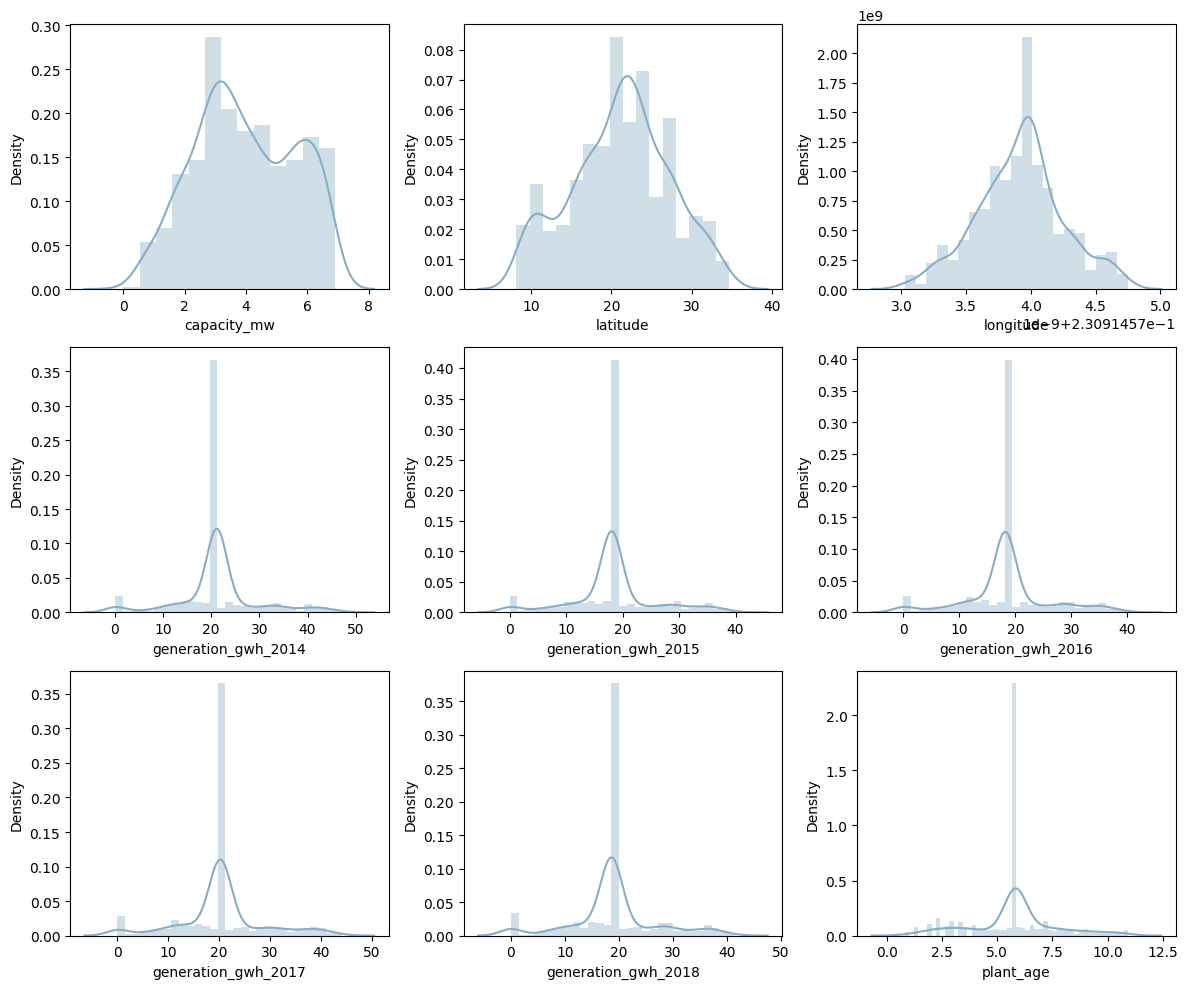

In [73]:
# Data distribution
plt.figure(figsize=(12, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 9:
        ax = plt.subplot(3, 3, plot_num)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

The distribution looks more normalised now.

### Encoding categorical variables

In [74]:
# Using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [75]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i].values.reshape(-1, 1))

In [76]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,1.232779,28.1839,0.230915,6,2,109,1,21.174845,18.096356,18.233098,20.263513,18.702234,3.612304
1,4.333764,24.7663,0.230915,1,2,174,2,21.174845,18.096356,18.233098,20.263513,18.702234,5.823349
2,3.523690,21.9038,0.230915,7,2,21,2,21.174845,18.096356,18.233098,20.263513,18.702234,5.823349
3,4.614726,23.8712,0.230915,2,2,22,2,19.354113,19.123832,19.343801,18.889810,17.615720,5.251691
4,6.817243,21.9603,0.230915,1,2,22,2,33.078759,34.891516,35.250240,37.182083,37.915160,2.300636


The categorical variables have been encoded now.

### Correlation analysis

In [77]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
capacity_mw,1.000000,0.055417,0.336230,-0.522406,-0.043167,-0.396930,0.477977,0.307676,0.324426,0.352087,0.335790,0.345180,-0.236088
latitude,0.055417,1.000000,-0.069496,-0.002374,0.037059,0.069624,-0.203636,0.105267,0.099864,0.117294,0.101055,0.108945,-0.109005
longitude,0.336230,-0.069496,1.000000,-0.405826,0.027795,-0.241795,0.301058,0.030364,0.029764,0.085213,0.072992,0.095986,-0.141559
primary_fuel,-0.522406,-0.002374,-0.405826,1.000000,0.006806,0.035757,-0.477833,-0.134796,-0.150181,-0.169737,-0.150250,-0.162774,0.139165
other_fuel1,-0.043167,0.037059,0.027795,0.006806,1.000000,0.028661,-0.022973,0.011621,0.037331,0.053383,0.019738,0.058587,-0.053690
source,-0.396930,0.069624,-0.241795,0.035757,0.028661,1.000000,-0.497294,-0.019614,-0.021258,-0.020898,-0.013145,-0.024208,-0.007783
geolocation_source,0.477977,-0.203636,0.301058,-0.477833,-0.022973,-0.497294,1.000000,0.015721,0.017040,0.016751,0.010536,0.019404,-0.006139
generation_gwh_2014,0.307676,0.105267,0.030364,-0.134796,0.011621,-0.019614,0.015721,1.000000,0.839602,0.783576,0.712063,0.716622,-0.033611
generation_gwh_2015,0.324426,0.099864,0.029764,-0.150181,0.037331,-0.021258,0.017040,0.839602,1.000000,0.881557,0.770377,0.771179,-0.094126
generation_gwh_2016,0.352087,0.117294,0.085213,-0.169737,0.053383,-0.020898,0.016751,0.783576,0.881557,1.000000,0.900660,0.895231,-0.187612


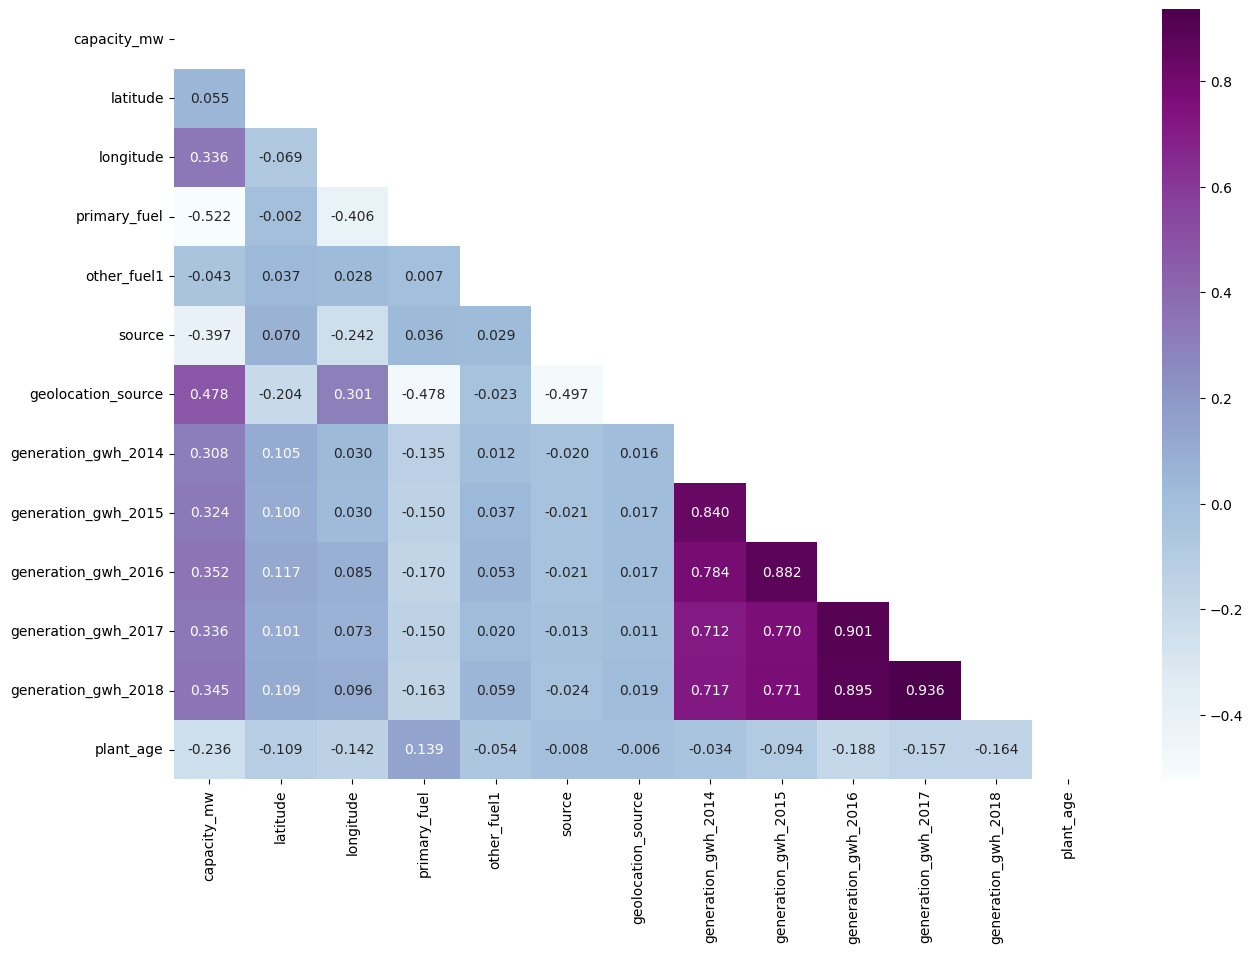

In [78]:
# Heatmap for correlation analysis
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='BuPu', mask=mask, annot_kws={"size": 10})
plt.show()

- There is a strong positive correlation between the electricity generation each year, particularly between 2017 and 2018.
- There seems to be moderately positive relationship between capacity of the plant and the electricity generation.
- There seems to be very low correlation between primary_fuel and other variables, except geolocation_source, capacity and longitude, all of which have negative relationship with primary fuel.

#### Correlation between primary_fuel and other features.

In [79]:
df.corr()['primary_fuel'].sort_values(ascending=False)

primary_fuel           1.000000
plant_age              0.139165
source                 0.035757
other_fuel1            0.006806
latitude              -0.002374
generation_gwh_2014   -0.134796
generation_gwh_2015   -0.150181
generation_gwh_2017   -0.150250
generation_gwh_2018   -0.162774
generation_gwh_2016   -0.169737
longitude             -0.405826
geolocation_source    -0.477833
capacity_mw           -0.522406
Name: primary_fuel, dtype: float64

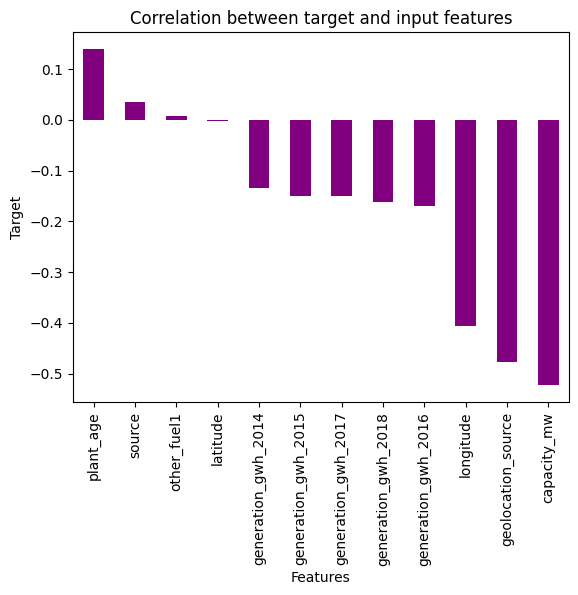

In [80]:
# Visualising the correlation between target and input features
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar', color='purple')
plt.title('Correlation between target and input features')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

There seems to very little correlation between primary_fuel and latitude and primary_fuel and other_fuel1.

#### Correlation between capacity_mw and other features.

In [81]:
df.corr()['capacity_mw'].sort_values(ascending=False)

capacity_mw            1.000000
geolocation_source     0.477977
generation_gwh_2016    0.352087
generation_gwh_2018    0.345180
longitude              0.336230
generation_gwh_2017    0.335790
generation_gwh_2015    0.324426
generation_gwh_2014    0.307676
latitude               0.055417
other_fuel1           -0.043167
plant_age             -0.236088
source                -0.396930
primary_fuel          -0.522406
Name: capacity_mw, dtype: float64

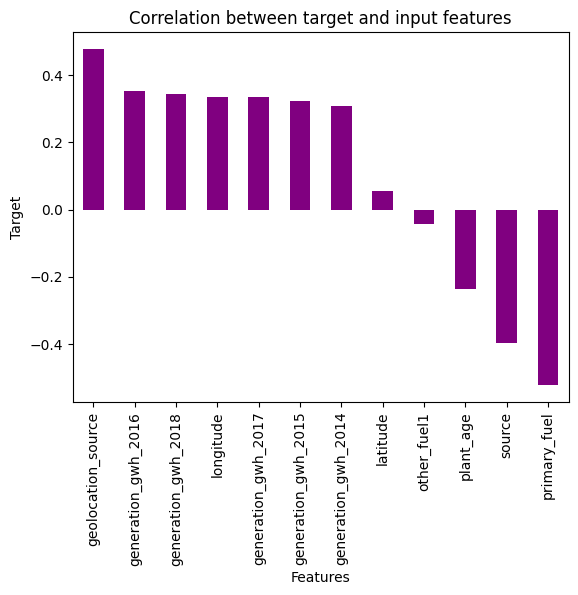

In [82]:
# Visualising the correlation between target and input features
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar', color='purple')
plt.title('Correlation between target and input features')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

There seems to very little correlation between capacity_mw and latitude and capacity_mw and other_fuel1.

Since both the target variables have very little correlation wth latitude and other_fuel1, these columns maybe dropped.

In [83]:
df.drop(columns=['latitude', 'other_fuel1'], inplace=True)

In [84]:
df.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,1.232779,0.230915,6,109,1,21.174845,18.096356,18.233098,20.263513,18.702234,3.612304
1,4.333764,0.230915,1,174,2,21.174845,18.096356,18.233098,20.263513,18.702234,5.823349
2,3.523690,0.230915,7,21,2,21.174845,18.096356,18.233098,20.263513,18.702234,5.823349
3,4.614726,0.230915,2,22,2,19.354113,19.123832,19.343801,18.889810,17.615720,5.251691
4,6.817243,0.230915,1,22,2,33.078759,34.891516,35.250240,37.182083,37.915160,2.300636


We can now proceed with the the two prediction tasks.

## Part 1: Predicting the primary_fuel

### Separating features and target

In [85]:
x = df.drop('primary_fuel', axis=1)
y = df['primary_fuel']

#### Feature scaling

In [86]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-1.676116,-0.926305,1.391906,-1.031579,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,-1.108432
1,0.231634,-0.507927,2.812646,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773
2,-0.266730,-2.360794,-0.531557,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773
3,0.404484,2.438692,-0.509699,0.408546,-0.263441,0.101715,0.111906,-0.191976,-0.186610,-0.257833
4,1.759489,1.252769,-0.509699,0.408546,1.432304,2.302682,2.301691,2.020971,2.412487,-1.788994


### Checking Variance Inflation Factor (VIF)

In [87]:
# Checking for multicollinearity using Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

,Features,VIF
0,capacity_mw,1.782082
1,longitude,1.192961
2,source,1.411947
3,geolocation_source,1.591302
4,generation_gwh_2014,3.613308
5,generation_gwh_2015,6.271104
6,generation_gwh_2016,10.936414
7,generation_gwh_2017,9.707524
8,generation_gwh_2018,9.211055
9,plant_age,1.153632


The VIF values should ideally be under 10. We need to remove the generation_gwh_2016 column to resolve any multicollinearity.

In [88]:
x.drop(columns='generation_gwh_2016', inplace=True)

In [89]:
vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

,Features,VIF
0,capacity_mw,1.782075
1,longitude,1.188825
2,source,1.411947
3,geolocation_source,1.591082
4,generation_gwh_2014,3.604938
5,generation_gwh_2015,4.354321
6,generation_gwh_2017,8.491002
7,generation_gwh_2018,8.632471
8,plant_age,1.121084


The VIF values are all within range now. So, we can proceed to build the model.

### Model Building

In [90]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Splitting data into train and test

In [91]:
# Finding the best random state for splitting the data into training and validation sets.
max_accu = 0
max_rs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        test_size=0.2,
                                                        random_state=i,
                                                        stratify=y
                                                       )
    # The split should be stratified so that y samples for both classes are equally represented in training and test data
    lr = LogisticRegression(multi_class='multinomial')
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    accu = accuracy_score(y_test, y_pred)
    if accu > max_accu:
        max_accu = accu
        max_rs = i
        
print(f'Best accuracy: {max_accu}\nRandom state for best accuracy: {max_rs}')

Best accuracy: 0.7529411764705882
Random state for best accuracy: 57


In [92]:
# Splitting into train-test data using best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2,
                                                    random_state=max_rs,
                                                    stratify=y
                                                   )

#### Checking for class imbalance

In [93]:
y_train.value_counts()

1    186
3    176
6    101
7     98
2     52
0     40
5     16
4      7
Name: primary_fuel, dtype: int64

There seems to be a lot of class imbalance which needs to be handled.

#### Oversampling using SMOTE

In [94]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42) # choosing random state for reproducible results
x1, y1 = sm.fit_resample(x_train, y_train)

In [95]:
y1.value_counts()

6    186
3    186
7    186
1    186
2    186
5    186
0    186
4    186
Name: primary_fuel, dtype: int64

The imbalance has now been resolved by oversampling.

#### Classification Models

In [96]:
# Importing several Classification models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
import catboost
import xgboost

# Importing model evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [97]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Classifier', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', xgboost.XGBClassifier()),
    ('CatBoost', catboost.CatBoostClassifier(verbose=0))
]

accuracies = []
confusion_matrices = []
classification_reports = []

for model_name, model in models:
    
    model.fit(x1, y1)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    accuracies.append((model_name, accuracy))
    confusion_matrices.append((model_name, cm))
    classification_reports.append((model_name, cr))

df_results = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])
df_results.sort_values('Accuracy', ascending=False, inplace=True)

df_results

,Model,Accuracy
8,XGBoost,0.852941
9,CatBoost,0.847059
5,Extra Trees,0.835294
4,Random Forest,0.817647
7,Gradient Boosting,0.817647
3,Decision Tree,0.764706
2,KNN,0.741176
1,Support Vector Classifier,0.664706
0,Logistic Regression,0.617647
6,AdaBoost,0.217647


We can observe that XGBoost model performs the best with 85.29% accuracy.

#### Confusion matrices

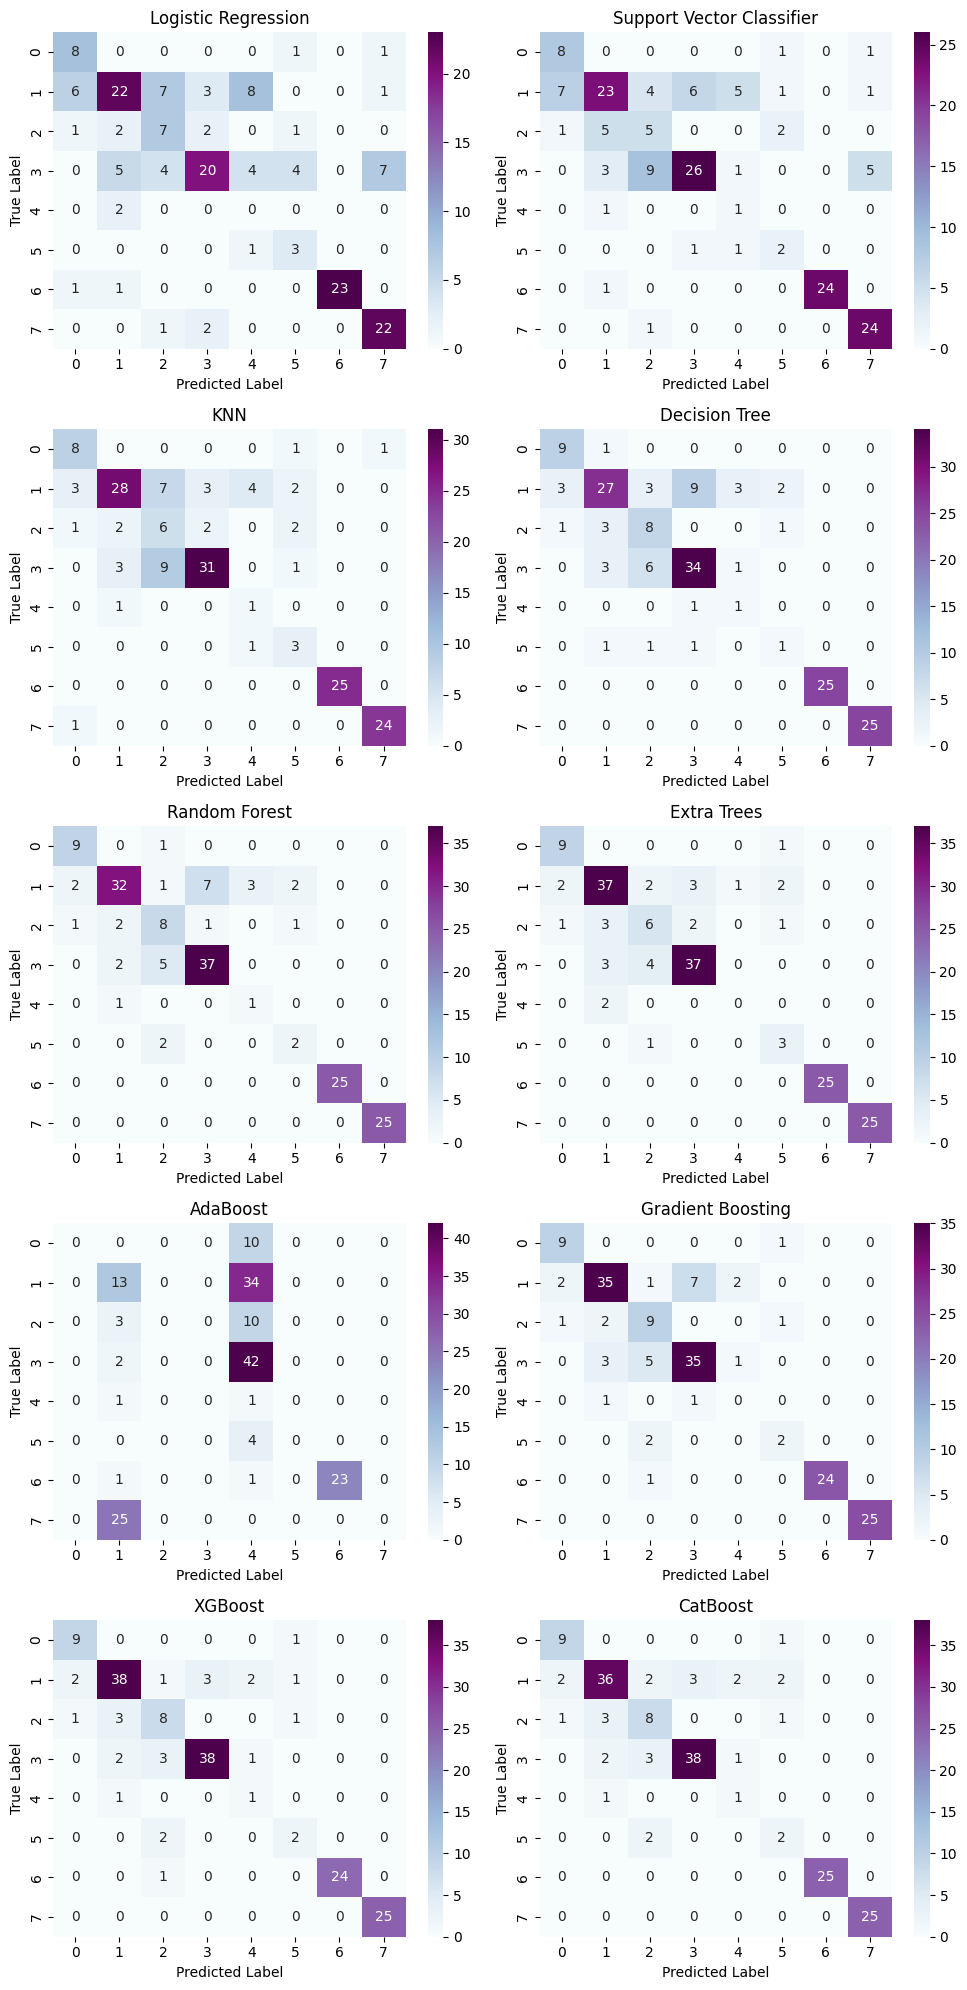

In [98]:
plt.figure(figsize=(10, 20))
for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(5, 2, i)
    plt.title(model_name)
    sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### Classification reports

In [99]:
for model_name, cr in classification_reports:
    print(model_name)
    print(cr)
    print('-'*60)

Logistic Regression
              precision    recall  f1-score   support

           0       0.50      0.80      0.62        10
           1       0.69      0.47      0.56        47
           2       0.37      0.54      0.44        13
           3       0.74      0.45      0.56        44
           4       0.00      0.00      0.00         2
           5       0.33      0.75      0.46         4
           6       1.00      0.92      0.96        25
           7       0.71      0.88      0.79        25

    accuracy                           0.62       170
   macro avg       0.54      0.60      0.55       170
weighted avg       0.70      0.62      0.64       170

------------------------------------------------------------
Support Vector Classifier
              precision    recall  f1-score   support

           0       0.50      0.80      0.62        10
           1       0.70      0.49      0.57        47
           2       0.26      0.38      0.31        13
           3       0.79  

For XGBoost model, both precision and recall values are also high along with the accuracy.

#### Using Cross Validation

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
accuracies = []

for model_name, model in models:
    cv_score = cross_val_score(model, x1, y1, cv=5) # Using fold value of 5
    mean_accuracy = cv_score.mean()
    
    model.fit(x1, y1)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    diff = abs(accuracy - mean_accuracy)
    
    accuracies.append((model_name, mean_accuracy, accuracy, diff))

df_results = pd.DataFrame(accuracies, columns=['Model', 'CV Accuracy', 'Accuracy', 'Difference'])
df_results.sort_values('Difference', ascending=True, inplace=True)

df_results

,Model,CV Accuracy,Accuracy,Difference
6,AdaBoost,0.278227,0.217647,0.060580
8,XGBoost,0.915337,0.852941,0.062396
9,CatBoost,0.919364,0.847059,0.072305
4,Random Forest,0.909968,0.829412,0.080556
7,Gradient Boosting,0.899216,0.817647,0.081569
0,Logistic Regression,0.708345,0.617647,0.090698
5,Extra Trees,0.926084,0.823529,0.102555
2,KNN,0.852155,0.741176,0.110978
1,Support Vector Classifier,0.786322,0.664706,0.121616
3,Decision Tree,0.862262,0.723529,0.138733


The least overfitting model is the AdaBoost Classifier. But it performs the worst on both test as well as validation data. So we need to discard it. The next best model is the XGBoost model. We will proceed o tune that model.

#### Hyperparameter Tuning

In [102]:
from sklearn.model_selection import GridSearchCV

##### XGBoost

In [103]:
params = {
    'max_depth': [1, 2, 5, 7, 10, 50],
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'subsample': [0.2, 0.5, 0.7, 1],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    }

In [104]:
gcv = GridSearchCV(xgboost.XGBClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'max_depth': [1, 2, 5, 7, 10, 50],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000],
                         'subsample': [0.2, 0.5, 0.7, 1]},
             scoring='accuracy')

In [105]:
best_params = gcv.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 600, 'subsample': 0.5}

In [106]:
model_xg = xgboost.XGBClassifier(**best_params)
model_xg.fit(x1, y1)
y_pred_xg = model_xg.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(accuracy_xg)

0.8411764705882353


The accuracy of the model is 84.12%

#### Plotting ROC for the model

In [107]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

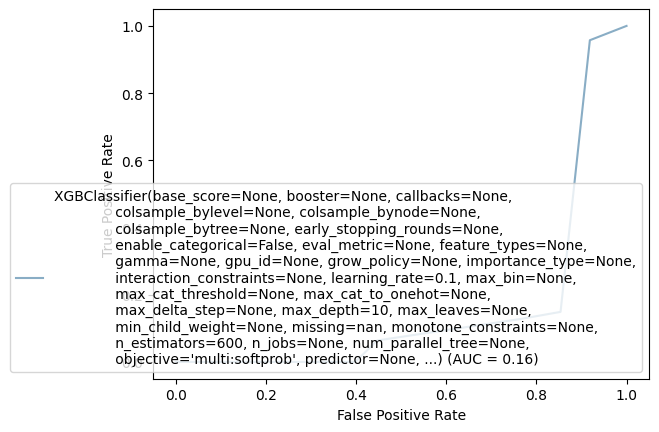

In [108]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xg, pos_label=True)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_xg)
display.plot()
plt.show()

The AUC value is 0.16

### Saving the model

In [109]:
import pickle

In [110]:
filename = 'powerplant_classification_model.pkl'
pickle.dump(model_xg, open(filename, 'wb'))

#### Predicting using the saved model

In [111]:
model = pickle.load(open('powerplant_classification_model.pkl', 'rb'))

pred = model.predict(x_test)

In [112]:
test_df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': pred})
test_df

,Actual,Predicted
0,3,3
1,3,3
2,1,5
3,0,0
4,1,1
...,...,...
165,2,1
166,7,7
167,7,7
168,1,1


These are the final predictions.

In [113]:
test_df.to_csv('powerplant_predictions.csv')

## Part 2: Predicting the capacity_mw

### Separating features and target

In [114]:
# Viewing the df
df

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,1.232779,0.230915,6,109,1,21.174845,18.096356,18.233098,20.263513,18.702234,3.612304
1,4.333764,0.230915,1,174,2,21.174845,18.096356,18.233098,20.263513,18.702234,5.823349
2,3.523690,0.230915,7,21,2,21.174845,18.096356,18.233098,20.263513,18.702234,5.823349
3,4.614726,0.230915,2,22,2,19.354113,19.123832,19.343801,18.889810,17.615720,5.251691
4,6.817243,0.230915,1,22,2,33.078759,34.891516,35.250240,37.182083,37.915160,2.300636
...,...,...,...,...,...,...,...,...,...,...,...
902,6.720039,0.230915,1,22,2,21.174845,0.759091,12.411697,20.648416,18.155798,1.881634
903,1.361851,0.230915,6,77,0,21.174845,18.096356,18.233098,20.263513,18.702234,5.823349
904,3.142726,0.230915,7,21,2,21.174845,18.096356,18.233098,20.263513,18.702234,5.823349
905,4.155018,0.230915,1,59,2,21.174845,18.096356,18.233098,20.263513,18.702234,5.823349


In [115]:
x = df.drop('capacity_mw', axis=1)
y = df['capacity_mw']

#### Feature scaling

In [116]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-0.926305,1.169593,1.391906,-1.031579,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,-1.108432
1,-0.507927,-0.981441,2.812646,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773
2,-2.360794,1.599800,-0.531557,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773
3,2.438692,-0.551234,-0.509699,0.408546,-0.263441,0.101715,0.111906,-0.191976,-0.186610,-0.257833
4,1.252769,-0.981441,-0.509699,0.408546,1.432304,2.302682,2.301691,2.020971,2.412487,-1.788994


### Checking Variance Inflation Factor (VIF)

In [117]:
# Checking for multicollinearity using Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

,Features,VIF
0,longitude,1.305007
1,primary_fuel,1.666560
2,source,1.503506
3,geolocation_source,1.874397
4,generation_gwh_2014,3.594053
5,generation_gwh_2015,6.265610
6,generation_gwh_2016,10.937612
7,generation_gwh_2017,9.695412
8,generation_gwh_2018,9.204361
9,plant_age,1.105986


Ideally, the VIF values should be below 10. Here, we can observe that VIF values for generation_gwh_2016 is higher. So we need to remove the column to avoid multicollinearity.

In [118]:
x.drop(columns='generation_gwh_2016', inplace=True)

In [119]:
vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

,Features,VIF
0,longitude,1.301433
1,primary_fuel,1.666371
2,source,1.503497
3,geolocation_source,1.873863
4,generation_gwh_2014,3.585801
5,generation_gwh_2015,4.352358
6,generation_gwh_2017,8.478959
7,generation_gwh_2018,8.626965
8,plant_age,1.073986


The VIF values are all within range now. So, we can proceed to build the model.

### Model Building

In [120]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Splitting data into train and test

In [121]:
# Finding the best random state for splitting the data
max_accu = 0
max_rs = 0
for i in range(0, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    accu = r2_score(y_test, y_pred)
    if accu > max_accu:
        max_accu = accu
        max_rs = i
        
print(f'Best accuracy: {max_accu}\nRandom state for best accuracy: {max_rs}')

Best accuracy: 0.6433842397057373
Random state for best accuracy: 170


In [122]:
# Splitting into train-test data using best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=max_rs)

#### Regression models

In [123]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost

In [124]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Support Vector Regressor', SVR()),
    ('KNN', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Extra Trees', ExtraTreesRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('XGBoost', xgboost.XGBRegressor())
]

results = []

for model_name, model in models:
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append((model_name, mae, rmse, r2))


df_results = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2'])
df_results.sort_values('R2', ascending=False, inplace=True)

df_results

,Model,MAE,RMSE,R2
6,Gradient Boosting,0.504830,0.657616,0.856238
4,Random Forest,0.494382,0.684127,0.844413
9,XGBoost,0.544297,0.728626,0.823515
5,Extra Trees,0.532087,0.755950,0.810030
1,Support Vector Regressor,0.638762,0.829669,0.771172
2,KNN,0.603417,0.842549,0.764012
3,Decision Tree,0.620002,0.896564,0.732785
0,Linear Regression,0.840492,1.035740,0.643384
8,Ridge,0.840740,1.035782,0.643356
7,Lasso,1.528665,1.753810,-0.022502


The Gradient Boosting model seems to have the best R2 score on the test data. The Lasso model has negative R2 score, which means its performance is bad.

#### Cross validation

In [125]:
from sklearn.model_selection import cross_val_score

In [126]:
results = []

for model_name, model in models:
    cv_score = cross_val_score(model, x_train, y_train, cv=5, scoring='r2') # Using fold value of 5
    mean_score = cv_score.mean()
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    diff = abs(r2 - mean_score)
    
    results.append((model_name, mae, rmse, r2, mean_score, diff))


df_results = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2', 'CV R2', 'Difference'])
df_results.sort_values('Difference', ascending=True, inplace=True)

df_results

,Model,MAE,RMSE,R2,CV R2,Difference
7,Lasso,1.528665,1.753810,-0.022502,-0.025508,0.003006
6,Gradient Boosting,0.505878,0.659059,0.855607,0.754676,0.100931
1,Support Vector Regressor,0.638762,0.829669,0.771172,0.669414,0.101758
4,Random Forest,0.491637,0.683330,0.844776,0.739495,0.105281
5,Extra Trees,0.512490,0.725249,0.825147,0.718692,0.106456
9,XGBoost,0.544297,0.728626,0.823515,0.715790,0.107725
2,KNN,0.603417,0.842549,0.764012,0.651308,0.112704
3,Decision Tree,0.611610,0.885390,0.739404,0.609430,0.129973
8,Ridge,0.840740,1.035782,0.643356,0.439964,0.203391
0,Linear Regression,0.840492,1.035740,0.643384,0.439819,0.203565


The Lasso model has negative R2 score, so we need to discard it. Extra Trees Regressor model has the least difference between cross validation R2 and test R2 scores. So it is the least overfitting model.

#### Hyperparameter tuning

In [127]:
from sklearn.model_selection import GridSearchCV

##### Extra Trees

In [128]:
params = {
    'max_depth': [int(x) for x in np.linspace(10, 110, 11)],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    'n_estimators': [100, 500, 700, 1000],
    }

In [129]:
gcv = GridSearchCV(ExtraTreesRegressor(), params, cv=5, scoring='r2')
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 500, 700, 1000]},
             scoring='r2')

In [130]:
best_params = gcv.best_params_
best_params

{'criterion': 'absolute_error',
 'max_depth': 80,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [131]:
model_et = ExtraTreesRegressor(**best_params)
model_et.fit(x_train, y_train)
y_pred = model_et.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 0.4738025073149338
Root Mean Squared Error: 0.6519112863784272
R2 Score: 0.8587215790581897


The R2 score is 85.84% for the Extra Trees model.

### Saving the model

In [132]:
filename = 'powerplant_regression_model.pkl'
pickle.dump(model_et, open(filename, 'wb'))

#### Predicting using the saved model

In [133]:
model = pickle.load(open('powerplant_regression_model.pkl', 'rb'))

pred = model.predict(x_test)

In [134]:
pred_df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': pred})
pred_df.head(25)

,Actual,Predicted
0,2.675963,2.331626
1,6.895690,6.477885
2,2.048167,3.605918
3,6.693788,6.559974
4,6.110020,5.399879
5,2.928281,3.093216
6,6.481410,6.097211
7,3.234924,3.547461
8,1.496472,3.388886
9,2.325391,1.886003


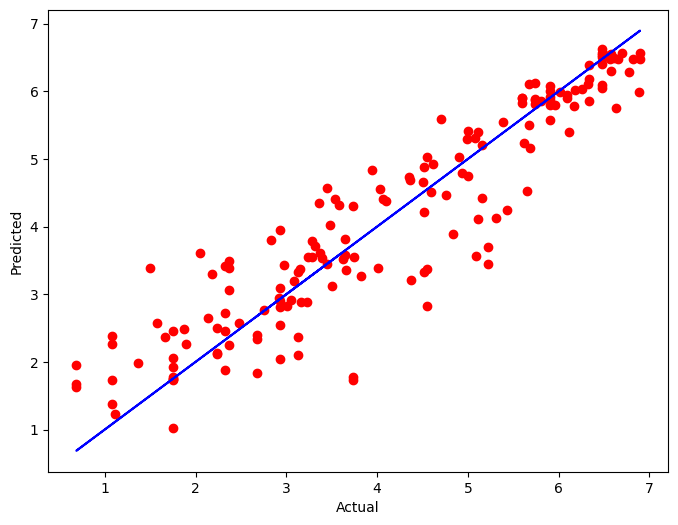

In [135]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

These are the final predictions.